# Section: Importing modules

In [1]:
import operator
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import display
import IPython.core.display as di
from IPython.core.interactiveshell import InteractiveShell

sys.path.append(str(Path('.').absolute().parent))

from include.config import CleaningConfig, PlottingConfig, NotebookConfig
from include.counting import get_count, get_percentage
from include.plotting import get_plot, display_side_by_side
from include.likertScalePlot import likert_scale
from include.textCleaning import wordcloud

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 

In [3]:
# This text is used to hide the code cell when exported in html
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [4]:
get_ipython().magic('matplotlib inline')  # Activate that line to use in Jupyter 
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

# Load dataset

In [5]:
df =  pd.read_csv('./uk/data/cleaned_data.csv')

In [6]:
print('The total number of particants in this study: {}'.format(len(df)))

The total number of particants in this study: 253


To find the total number of participants, we took all submissions and then removed those from people who were outside the country (see question 1) and those from people who had not completed the first ten questions (i.e. those people who did not complete the first page of the survey). More details can be found [here](https://github.com/softwaresaved/survey_additional_analysis/blob/master/dropping_participants_process.ipynb).

# Section 1. Social demographics

In this section, we determine some information about the demographics of the respondents: gender, pay, educational level, age and ethnic origin. (These cover questions 1-5 and 54-58 in the survey.)

## Country of work

The data was cleaned to remove all non-UK respondents.

In [7]:
v_to_count, filename  = get_count(df, ['socio1. In which country do you work?'], "one choice", "./../../survey_creation/2017/uk/listAnswers/countries.csv", "False", "./uk/output/")

In [8]:
perc_to_count = get_percentage(v_to_count, filename)

In [9]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
In which country do you work?                  
United Kingdom                   253        100

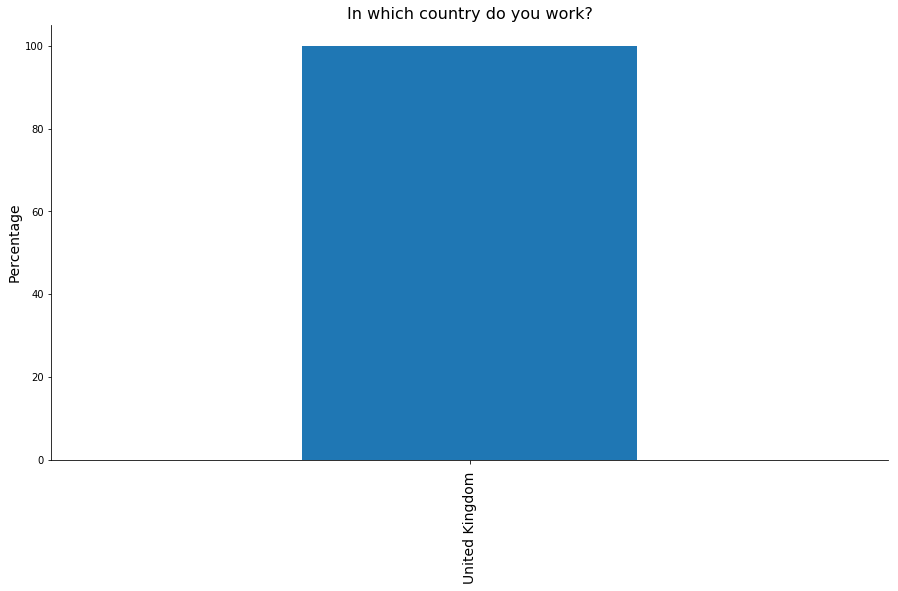

In [10]:
_ = get_plot(perc_to_count, "one choice")

## Qualifications

Most RSEs (67.19%) hold a PhD as their highest qualification and almost another quarter hold a Masters degree. Only 10% of RSEs hold an undergraduate degree as their highest qualification.

Most RSEs derive from a background in Computer Science (27%) and Physics and Astronomy (27%). There is a significant reduction in numbers in the next most popular background Mathematics (8%).

In [11]:
v_to_count, filename  = get_count(df, ['edu1. What is the highest qualification you have obtained?'], "one choice", "./../../survey_creation/2017/uk/listAnswers/education.csv", "False", "./uk/output/")

In [12]:
perc_to_count = get_percentage(v_to_count, filename)

In [13]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What is the highest qualification you have obta...                  
Doctorate                                             170         67
Master degree                                          56         22
Undergraduate degree                                   25         10
Other                                                   2          1

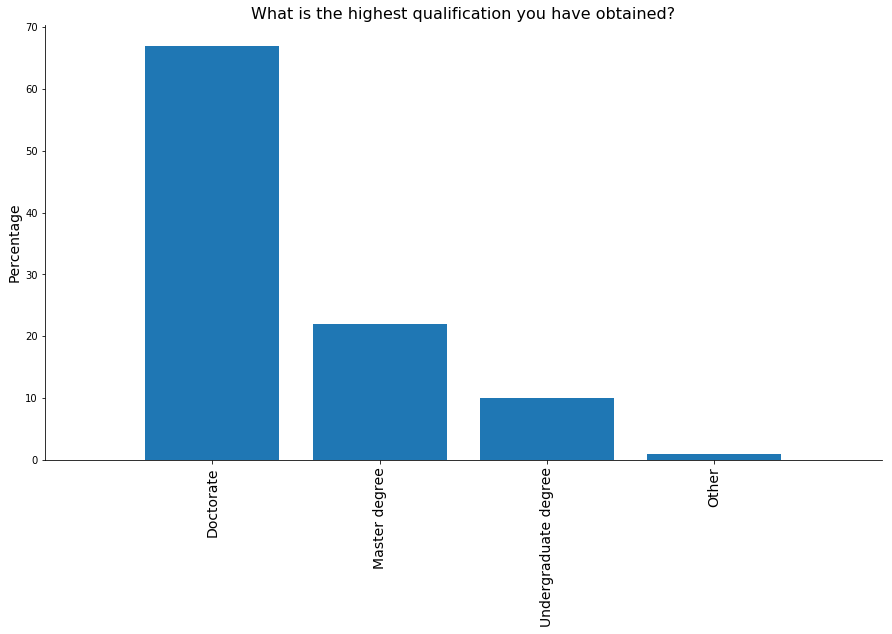

In [14]:
_ = get_plot(perc_to_count, "one choice")

## Field of qualification

In [15]:
v_to_count, filename  = get_count(df, ['edu2. In which subject is your highest academic qualification?'], "one choice", "./../../survey_creation/2017/uk/listAnswers/academic_field.csv", "False", "./uk/output/")

In [16]:
perc_to_count = get_percentage(v_to_count, filename)

In [17]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
In which subject is your highest academic quali...                  
Computer Science                                       69         27
Physics and Astronomy                                  69         27
Mathematics                                            19          8
Chemistry                                              16          6
Biological Sciences                                    15          6
Other                                                  12          5
Geography & Environmental Sciences                     10          4
Electrical & Electronic Engineering                     8          3
Civil Engineering                                       6          2
Mechanical Engineering                                  4          2
Geology                                                 3          1
Materials Technology                                    3          1
Psychology                                              3          1
Linguistics                                             3          1
General Engineering                                     3          1
Aeronautical & Manufacturing Engineering                2          1
Medicine                                                2          1
History                                                 1          0
Art & Design                                            1          0
Theology & Religious Studies                            1          0
Robotics                                                1          0
NaN                                                     2        NaN

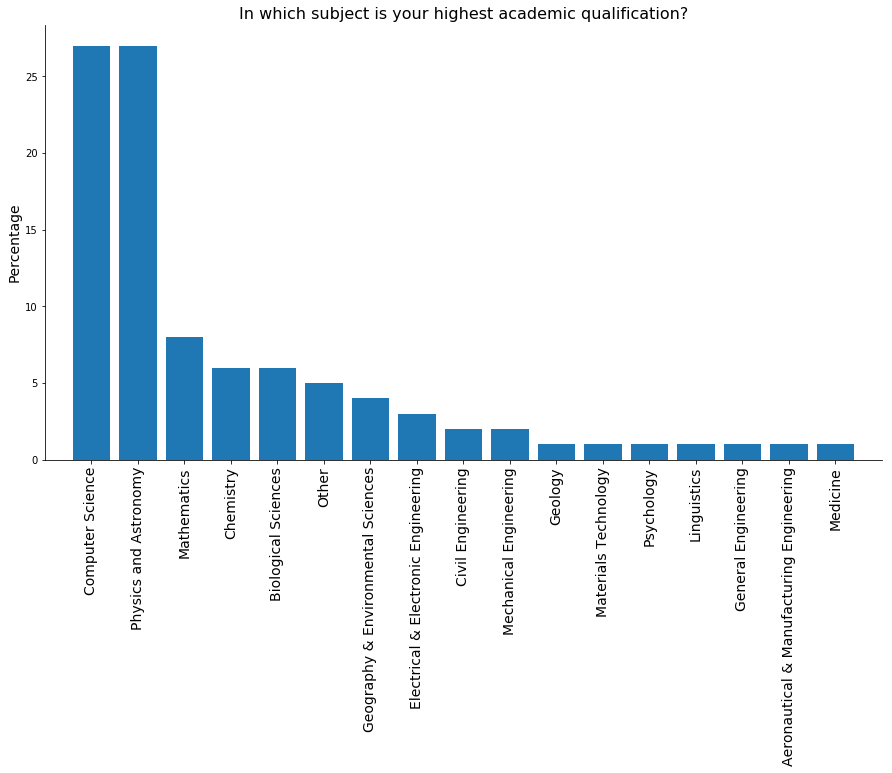

In [18]:
_ = get_plot(perc_to_count, "one choice")

## Gender

In the 2016 UK survey of RSEs we found a significant gender imbalance in the RSE Community: of the respondents who provided answers (n=263), 88% were male, 11% female and less than 1% described their gender as "other". In the 2017 UK survey, we find that these figures are shifted slightly to 84% male, 15% female and less than 1% who describe their gender as "other". The RSE community in the UK is predominantly male.

In [19]:
v_to_count, filename  = get_count(df, ['socio2. Please select your gender'], "one choice", "./../../survey_creation/2017/uk/listAnswers/gender.csv", "False", "./uk/output/")

In [20]:
perc_to_count = get_percentage(v_to_count, filename)

In [21]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Please select your gender                  
Male                         183         84
Female                        33         15
Other                          1          0
NaN                           36        NaN

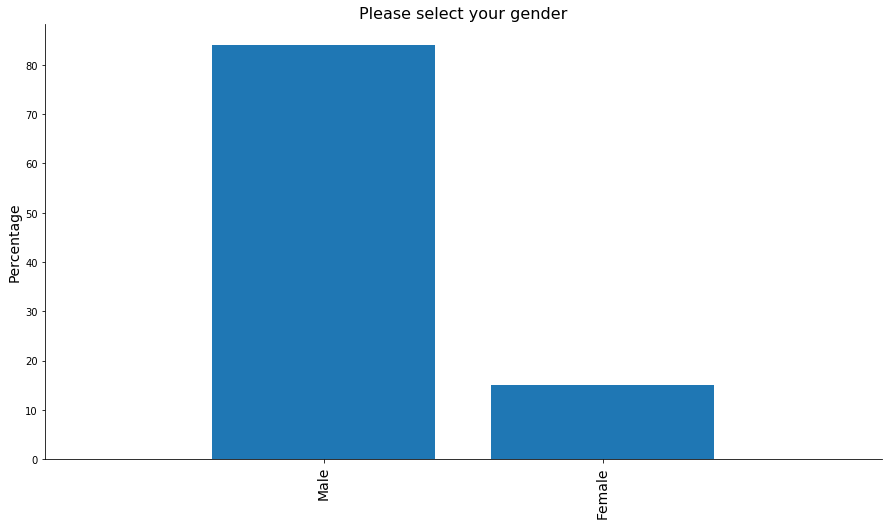

In [22]:
_ = get_plot(perc_to_count, "one choice")

## Age

The majority of RSEs fall within the 25-44 years old age range, with the peak in the 35-44 years old age range. RSEs are younger than senior academics and less well distributed over age ranges than academics in general (see [HESA](https://www.hesa.ac.uk/news/26-02-2015/age-and-gender-of-staff) for details).

In [23]:
v_to_count, filename  = get_count(df, ['socio3. Please select your age'], "one choice", "./../../survey_creation/2017/uk/listAnswers/age.csv", "True", "./uk/output/")

In [24]:
perc_to_count = get_percentage(v_to_count, filename)

In [25]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Please select your age                  
18 to 24 years              4          2
25 to 34 years             78         35
35 to 44 years             88         40
45 to 54 years             38         17
55 to 64 years             12          5
NaN                        33        NaN

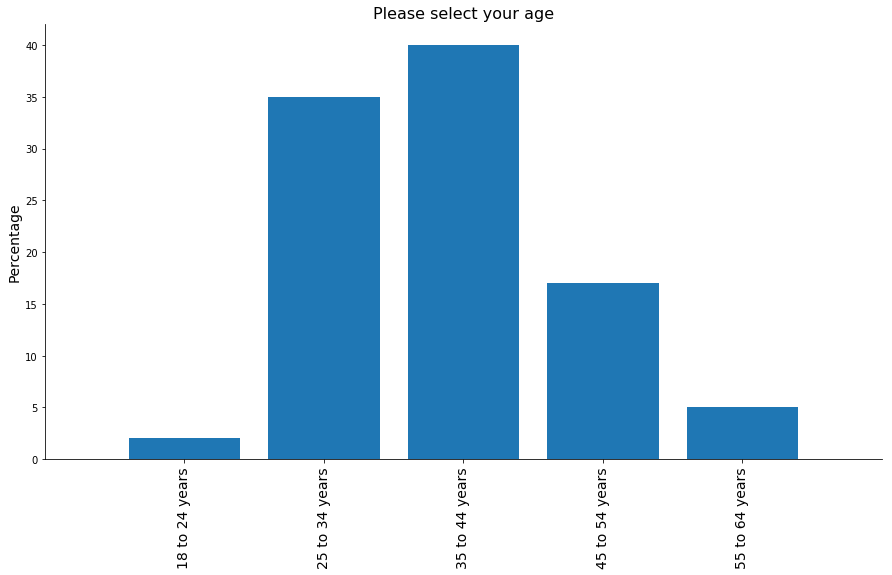

In [26]:
_ = get_plot(perc_to_count, "one choice")

## Salary

Almost half of RSEs are paid in the range of £32,277-£43,325, and around a quarter are paid in the range of £43,325-£58,172. This is significantly different to academic staff, where around a third of academics are paid in range of £32,277-£43,325 and a third in the range of £43,325-£58,172 (see [HESA](https://www.hesa.ac.uk/data-and-analysis/publications/staff-2015-16/introduction)). 

In [27]:
v_to_count, filename  = get_count(df, ['socio4. Please select the range of your salary'], "likert", "./../../survey_creation/2017/uk/listAnswers/salary.csv", "True", "./uk/output/")

In [28]:
perc_to_count = get_percentage(v_to_count, filename)

In [29]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Please select the range of your salary                  
< £18,031                                   7          3
≥ £18,031 and < £24,057                     4          2
≥ £24,057 and < £32,277                    36         17
≥ £32,277 and < £43,325                    99         47
≥ £43,325 and < £58,172                    56         27
≥ £58,172                                   8          4

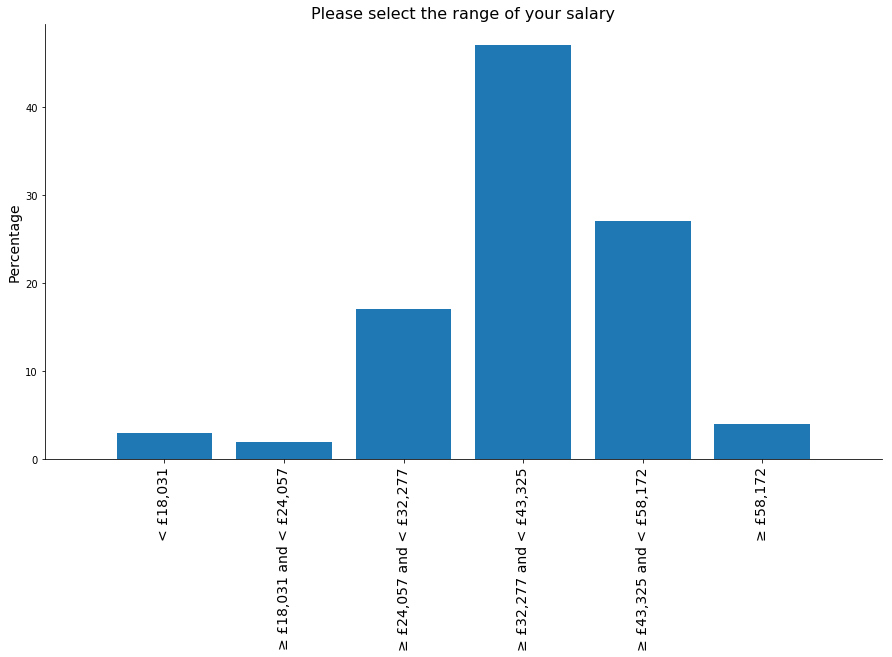

In [30]:
_ = get_plot(perc_to_count, "one choice")

## Ethnic origin

RSEs are predominently white (91.9%) which is less diverse than England and Wales as a whole (86% white, see [Office of National Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/culturalidentity/ethnicity/articles/ethnicityandnationalidentityinenglandandwales/2012-12-11)), and indeed less diverse than the academic community in England, but similar to the ethnic range of Professors (see [HESA](https://www.hesa.ac.uk/news/01-03-2012/higher-education-staff)).

In [31]:
v_to_count, filename  = get_count(df, ['socio5. How would you describe your ethnic origin? This refers to people who share the same cultural background and identity, not country of birth or nationality.'], "one choice", "./../../survey_creation/2017/uk/listAnswers/ethnicity.csv", "False", "./uk/output/")

In [32]:
perc_to_count = get_percentage(v_to_count, filename)

In [33]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
How would you describe your ethnic origin? This...                  
White: English / Welsh / Scottish / Northern Ir...    136         65
White: Any other White background                      57         27
Asian / Asian British: Chinese                          5          2
Other Ethnic group: Any other ethnic group              3          1
White: Irish                                            3          1
Mixed / Multipe Ethnic groups: Any other Mixed ...      2          1
Black / African / Caribbean / Black Britsh:  Af...      2          1
Mixed / Multipe Ethnic groups: White and Black ...      1          0
Asian / Asian British: Indian                           1          0
NaN                                                    43        NaN

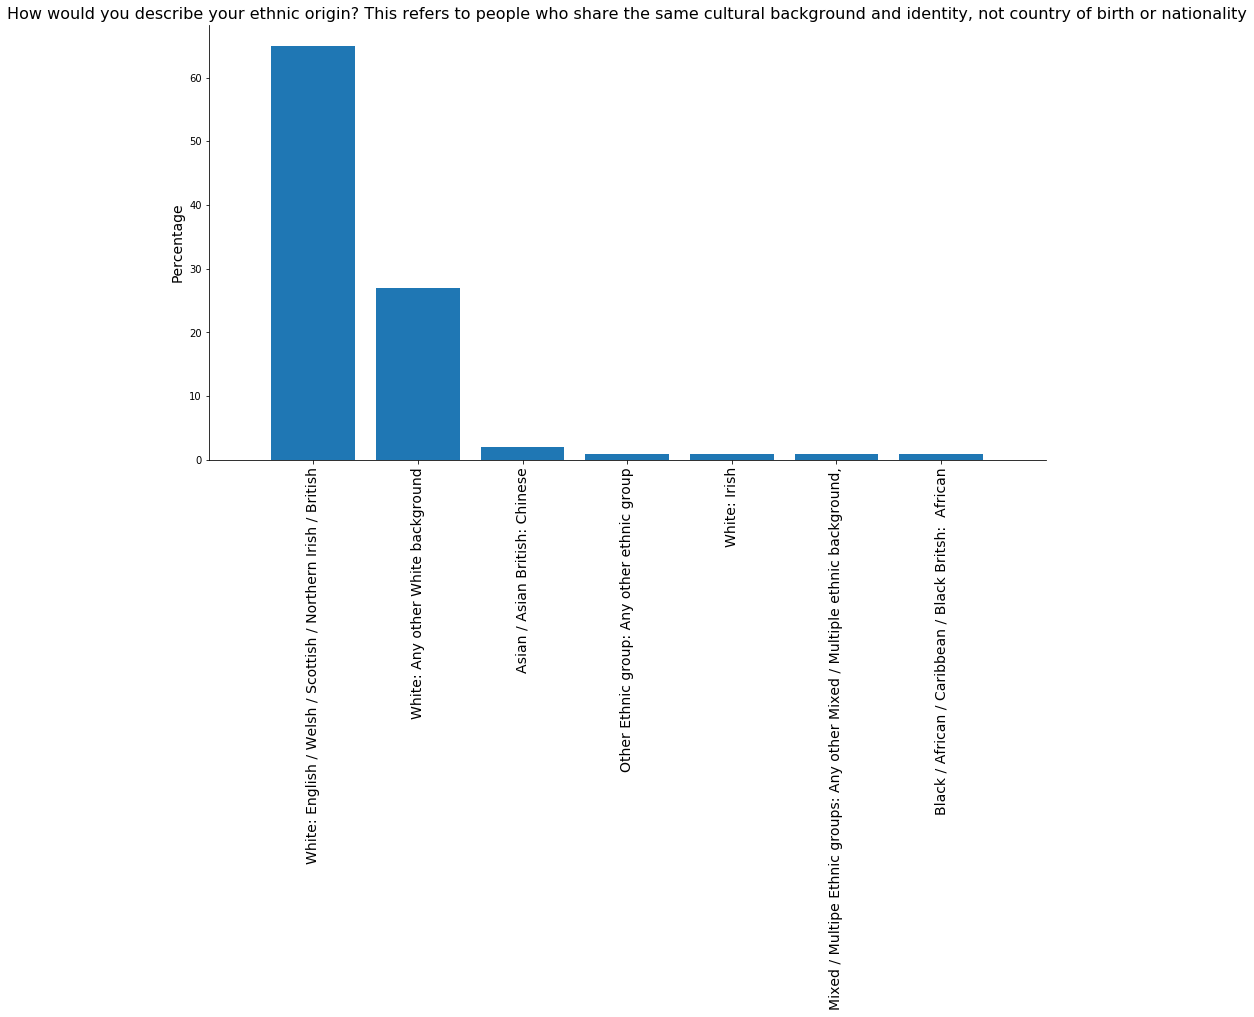

In [34]:
_ = get_plot(perc_to_count, "one choice")

## Disablity status

RSEs who report a condition that is defined as a disability by the Equality Act 2010 make up 4.78% of the RSE community, which is in line with the number of academic staff who report a disability (4.00%).

In [35]:
v_to_count, filename  = get_count(df, ['disa1. Do you have a condition that is defined as a disability by the Equality Act 2010*'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [36]:
perc_to_count = get_percentage(v_to_count, filename)

In [37]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you have a condition that is defined as a di...                            
 Do you have a condition that is defined as a d...           10         199   

                                                    NaN value  \
Do you have a condition that is defined as a di...              
 Do you have a condition that is defined as a d...         44   

                                                   Yes [Percentage]  \
Do you have a condition that is defined as a di...                    
 Do you have a condition that is defined as a d...                5   

                                                   No [Percentage]  
Do you have a condition that is defined as a di...                  
 Do you have a condition that is defined as a d...              95

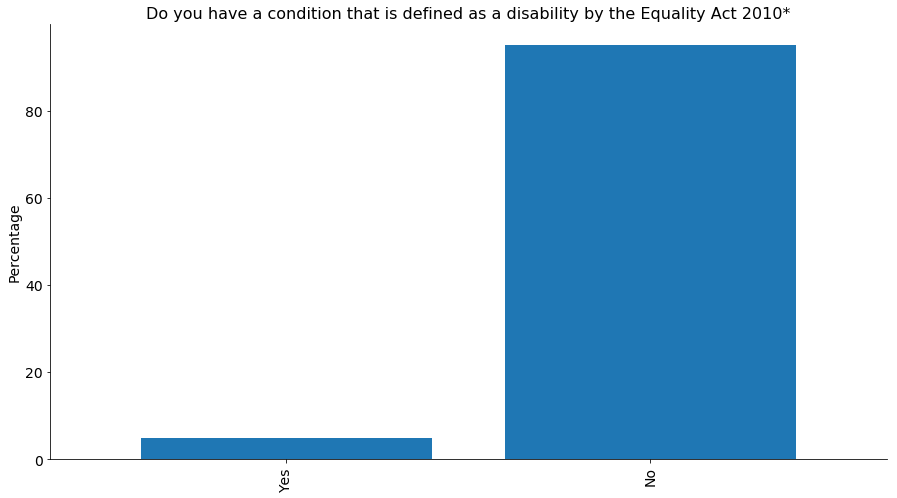

In [38]:
_ = get_plot(perc_to_count, "y/n/na")

## Professional qualifications

The most popular professional qualifications are chartered engineer and chartered physicist.

In [39]:
data = df['edu4. Do you hold any professional qualifications?'].dropna()
data = [z.replace('/', ',').replace(';', ',').strip().lower() for z in data]
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
data = [ ''.join(i for i in s if not i.isdigit()).strip() for s in data]
print('There are {} propositions'.format(len(data)))
data = [i.strip() for i in data if len(i.strip()) > 2 and i.strip().lower() not in ['dr.', 'msc', 'm.a.', 'bsc', 'b.sc.', 'no', 'diplom', 'none', 'ba. sc.', 'ma. sc.']]
print('Number of participants that have a professional qualifications: {}'.format(len(data)))

There are 61 propositions
Number of participants that have a professional qualifications: 60


In [40]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3:
        print(k[0].title(), k[1])

Cphys 4
Ceng 4
Mbcs 2
Minstp 2
Cchem 2
Csci 2
Prince Practitioner 2
Fellow Of The Higher Education Academy 2
Prince Practitioners 1
Graduate Statistician Of Royal Statistical Society 1
Aws Csa 1
Citp 1
Cmath Mima Csci 1
Prince  Practioner 1
Linux Lpi Level 1
Chartered Engineer (Ceng) 1
Fellow Of The Higher Education Academy (Fhea) 1
Itil Foundation Certified 1
Apple Osx Certification 1
Prince Foundation 1
Registered Clinical Scientist 1
Celta 1
Msci 1
Pgce 1
Pgdip 1
Mieee 1
Fras 1
Fellow Royal Statistical Society 1
Rhce 1
Bcs Member 1
Chartered Member Of Cilip 1
Mrsc 1
Java Certified Developer 1
Management Diploma 1
Miet 1
Microsoft Mvp 1
Finstp 1
Itil Foundation Certificate In It Services Management 1
Mlso (Medical Laboratory Scientific Officer) 1
Itil Foundation 1
Phd In Physics 1
Certified Labview Developer 1
Open University Software And It Modules 1
Actuarial 1
C.Phys 1
Prince 1


In [41]:
wc = wordcloud(df, ['edu4. Do you hold any professional qualifications?'])

(-0.5, 1499.5, 799.5, -0.5)

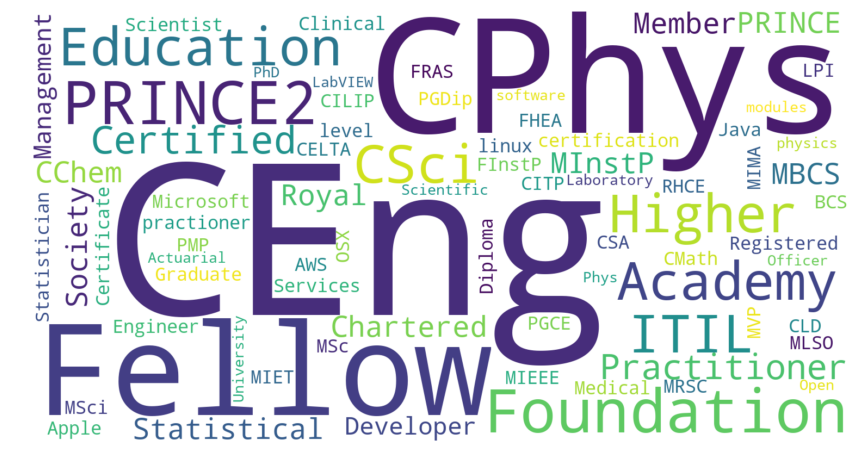

In [42]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Section 2. Questions about coding

In this section we investigate the relationship between RSEs and the code they develop.

As expected, the vast majority of RSEs (97%) write code, but only around half of them consider themselves a "professional software developer" - despite the respondents having on average 13 years of software development experience. There is a marked and significant trend for code developed by RSEs to be used mainly used by other people.

Unsurprisingly, RSEs spend the majority of their time coding. The only other major call on their time is "research", so it would appear that their job title accurately describes their work. "Teaching" is the aspect of work with the least call on RSEs time: 43% of RSEs reported that they spent no time teaching.

### Do you write code as part of your job?

In [43]:
v_to_count, filename  = get_count(df, ['rse1. Do you write code as part of your job?'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [44]:
perc_to_count = get_percentage(v_to_count, filename)

In [45]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you write code as part of your job?                             
 Do you write code as part of your job?          246           7   

                                        Yes [Percentage] No [Percentage]  
Do you write code as part of your job?                                    
 Do you write code as part of your job?               97               3

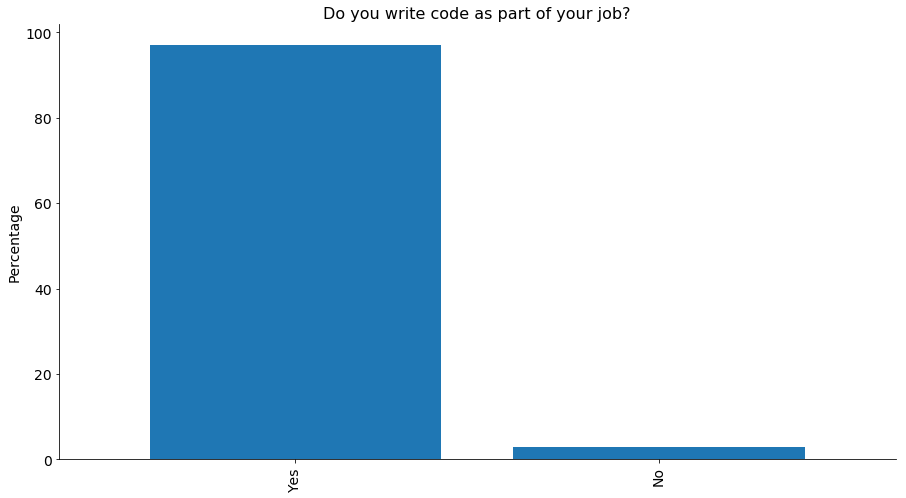

In [46]:
_ = get_plot(perc_to_count, "y/n/na")

### Who uses the code

In [47]:
v_to_count, filename  = get_count(df, ['rse3[SQ001]. Who uses the code that you write? []'], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_usage_5.csv", "False", "./uk/output/")

In [48]:
perc_to_count = get_percentage(v_to_count, filename)

In [49]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Who uses the code that you write?                  
0 - Mostly me                          7          3
1                                     34         14
2                                     31         13
3                                     38         15
4                                     60         24
5 - Mostly other people               76         31

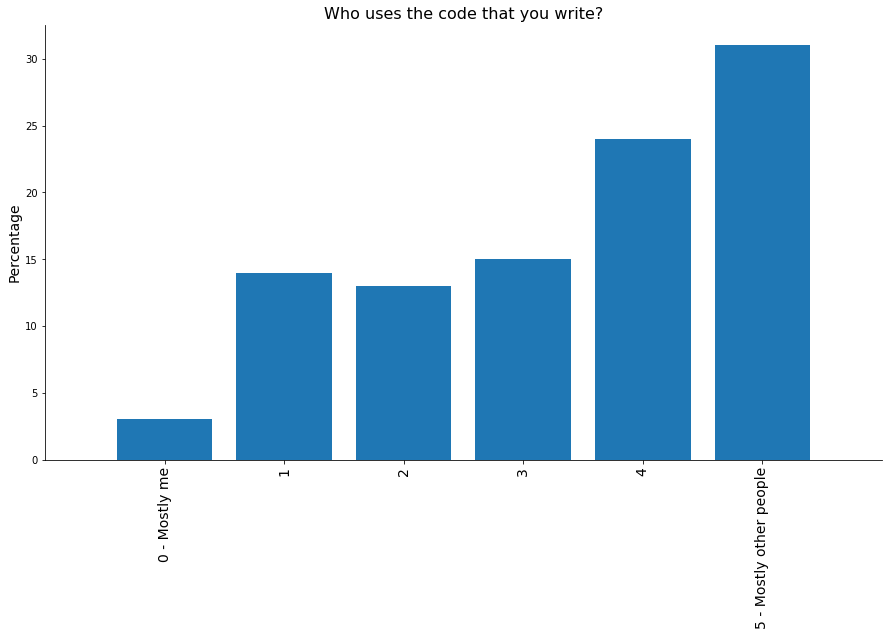

In [50]:
_ = get_plot(perc_to_count, "likert")

### Do you consider yourself a professional software developer?

In [51]:
v_to_count, filename  = get_count(df, ['soft2can. Do you consider yourself a professional software developer?'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [52]:
perc_to_count = get_percentage(v_to_count, filename)

In [53]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you consider yourself a professional softwar...                            
 Do you consider yourself a professional softwa...          147         106   

                                                   Yes [Percentage]  \
Do you consider yourself a professional softwar...                    
 Do you consider yourself a professional softwa...               58   

                                                   No [Percentage]  
Do you consider yourself a professional softwar...                  
 Do you consider yourself a professional softwa...              42

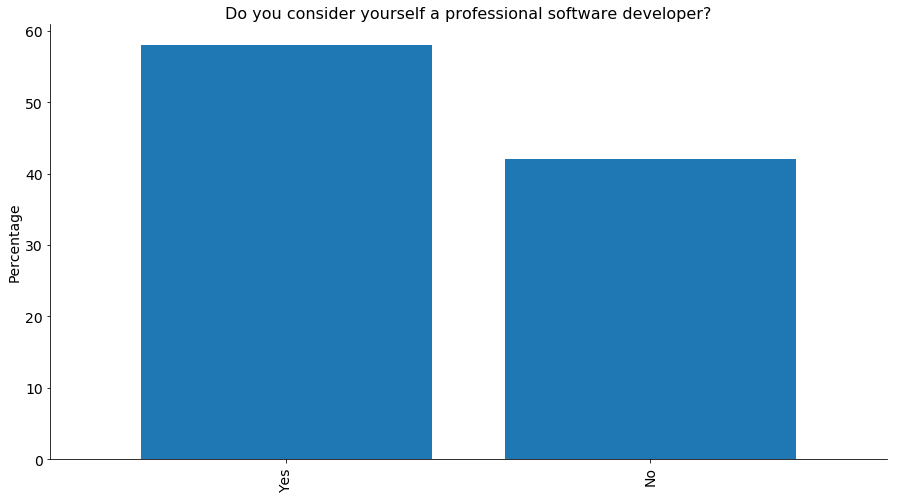

In [54]:
_ = get_plot(perc_to_count, "y/n/na")

### How many years of Software development experience do you have?

In [55]:
v_to_count, filename  = get_count(df, ['soft1can. How many years of software development experience do you have?'], "freenumeric", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

       soft1can. How many years of software development experience do you have?
count                                         147.000000                       
mean                                           13.707483                       
std                                             7.823578                       
min                                             1.000000                       
25%                                             8.000000                       
50%                                            12.000000                       
75%                                            18.500000                       
max                                            40.000000                       


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


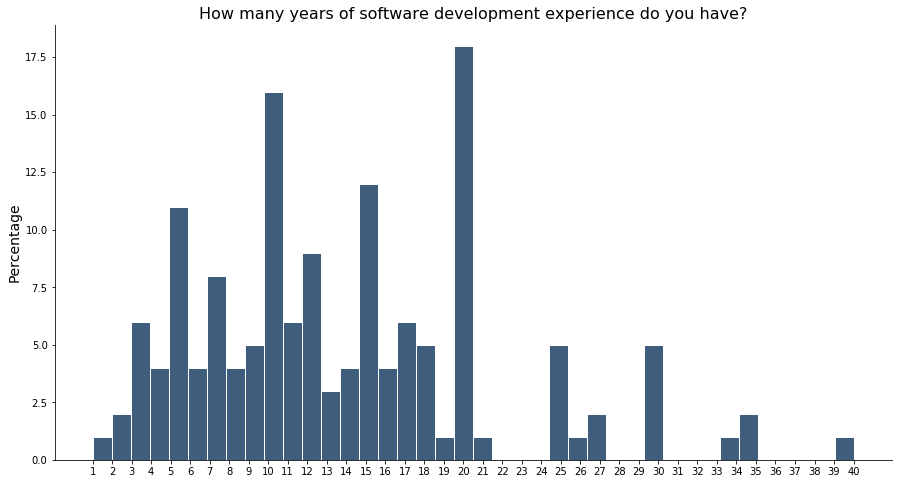

In [56]:
_ = get_plot(v_to_count, "freenumeric")

### In an average month, how much time do you spend on software development (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.)

In [57]:
v_to_count, filename  = get_count(df, ['time1can[time1can]. In an average month, how much time do you spend on: [Software development]', 'time1can[time2can]. In an average month, how much time do you spend on: [Research]', 'time1can[time3can]. In an average month, how much time do you spend on: [People management]', 'time1can[time6can]. In an average month, how much time do you spend on: [Project management]', 'time1can[time4can]. In an average month, how much time do you spend on: [Teaching]', 'time1can[time5can]. In an average month, how much time do you spend on: [Other activities]'], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_time_10.csv", "False", "./uk/output/")

In [58]:
display(v_to_count) 

Software development  \
In an average month, how much time do you spend...                         
1 (None at all)                                                        5   
2                                                                     16   
3                                                                     24   
4                                                                     35   
5                                                                     35   
6                                                                     24   
7                                                                     50   
8                                                                     41   
9                                                                     16   
10 (All my time)                                                       7   

                                                    Research  \
In an average month, how much time do you spend...             
1 (None at all)                                           45   
2                                                         58   
3                                                         37   
4                                                         29   
5                                                         25   
6                                                         20   
7                                                         20   
8                                                         10   
9                                                          7   
10 (All my time)                                           2   

                                                    People management  \
In an average month, how much time do you spend...                      
1 (None at all)                                                 102.0   
2                                                                76.0   
3                                                                33.0   
4                                                                16.0   
5                                                                 6.0   
6                                                                 7.0   
7                                                                 7.0   
8                                                                 5.0   
9                                                                 NaN   
10 (All my time)                                                  1.0   

                                                    Project management  \
In an average month, how much time do you spend...                       
1 (None at all)                                                     32   
2                                                                   86   
3                                                                   58   
4                                                                   23   
5                                                                   26   
6                                                                   11   
7                                                                    9   
8                                                                    4   
9                                                                    2   
10 (All my time)                                                     2   

                                                    Teaching  Other activities  
In an average month, how much time do you spend...                              
1 (None at all)                                        109.0              52.0  
2                                                       77.0              88.0  
3                                                       33.0              40.0  
4                                                       17.0              29.0  
5                                                        6.0              19.0  
6                                    

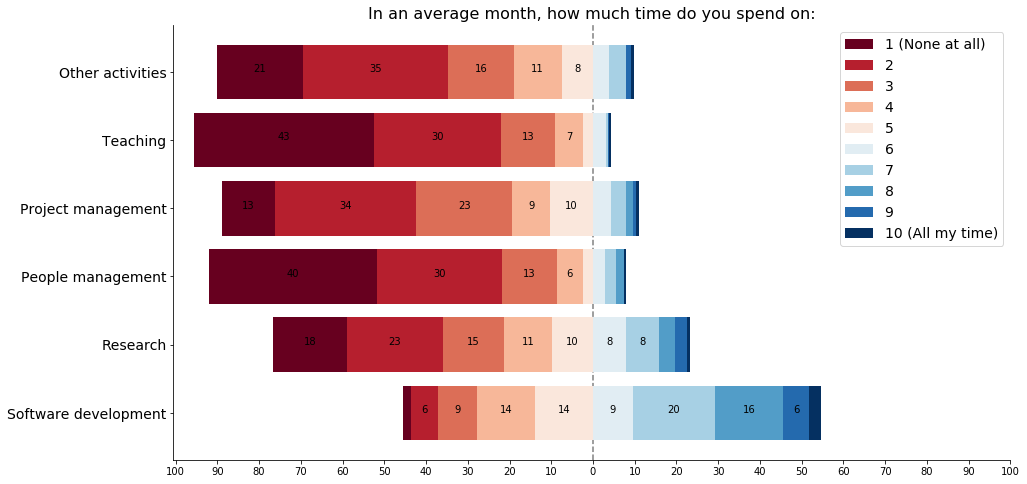

In [59]:
_ = get_plot(v_to_count, "likert")

# Section 3: Questions about employment

RSEs mainly work within universities: in total 66% work within a university. 51% of RSEs work in a university within an academic group (rather than in university within an IT service (8%) or HPC group (7%)). The other significant workplace for RSEs are the national laboratories where 16% of RSEs work.

Most respondents came from Russell Group universities: the top 13 universities where RSEs work are all within the Russell Group. 

### What type of organisation do you work for?

In [60]:
v_to_count, filename  = get_count(df, ['currentEmp1. What type of organisation do you work for?'], "one choice", "./../../survey_creation/2017/uk/listAnswers/type_organisation.csv", "False", "./uk/output/")

In [61]:
perc_to_count = get_percentage(v_to_count, filename)

In [62]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What type of organisation do you work for?                  
University - within an academic group         128         51
National laboratory                            41         16
University - within an IT service              21          8
University - within an HPC group               18          7
Government                                     17          7
Other                                          13          5
Private company                                 8          3
NGO                                             7          3

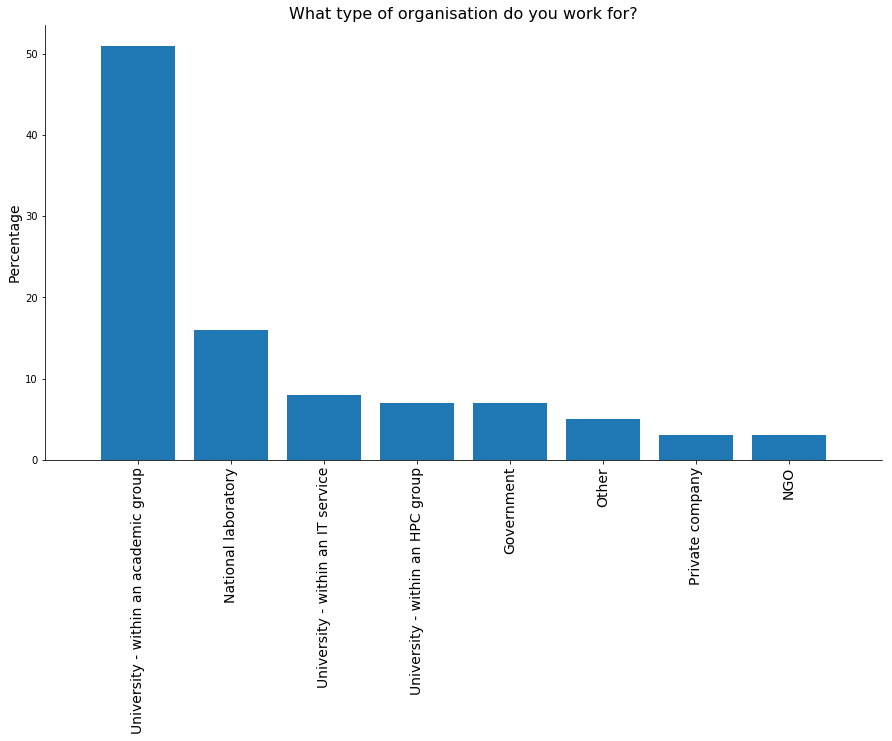

In [63]:
_ = get_plot(perc_to_count, "one choice")

### Which University?

In [64]:
v_to_count, filename  = get_count(df, ['currentEmp2. Which university?'], "one choice", "./../../survey_creation/2017/uk/listAnswers/universities.csv", "False", "./uk/output/")

In [65]:
perc_to_count = get_percentage(v_to_count, filename)

In [66]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which university?                                                   
University of Edinburgh                                23         14
University of Sheffield                                14          8
University College London (UCL)                        11          7
University of Oxford                                   11          7
University of Manchester                               11          7
University of St Andrews                               10          6
University of Cambridge                                 9          5
University of Southampton                               8          5
University of Leeds                                     7          4
University of Bristol                                   7          4
Imperial College London                                 6          4
University of Birmingham                                5          3
University of Warwick, Coventry                         4          2
University of Reading                                   3          2
University of Bath                                      3          2
Newcastle University                                    3          2
University of Dundee                                    3          2
Bournemouth University                                  2          1
Durham University, Durham and Stockton-on-Tees ...      2          1
University of York                                      2          1
University of Glasgow                                   2          1
King's College London                                   2          1
Other                                                   2          1
University of Exeter                                    2          1
Heriot-Watt University, Edinburgh and Galashiels        1          1
University of Sussex, Falmer and Brighton               1          1
Queen Mary, University of London                        1          1
Swansea University                                      1          1
University of Liverpool                                 1          1
University of Leicester                                 1          1
Cranfield University, Cranfield, and Shrivenham         1          1
St George's, University of London                       1          1
Royal Veterinary College                                1          1
Birkbeck, University of London                          1          1
University of Gloucestershire, Cheltenham, Glou...      1          1
Bangor University                                       1          1
University of Nottingham                                1          1
NaN                                                    88        NaN

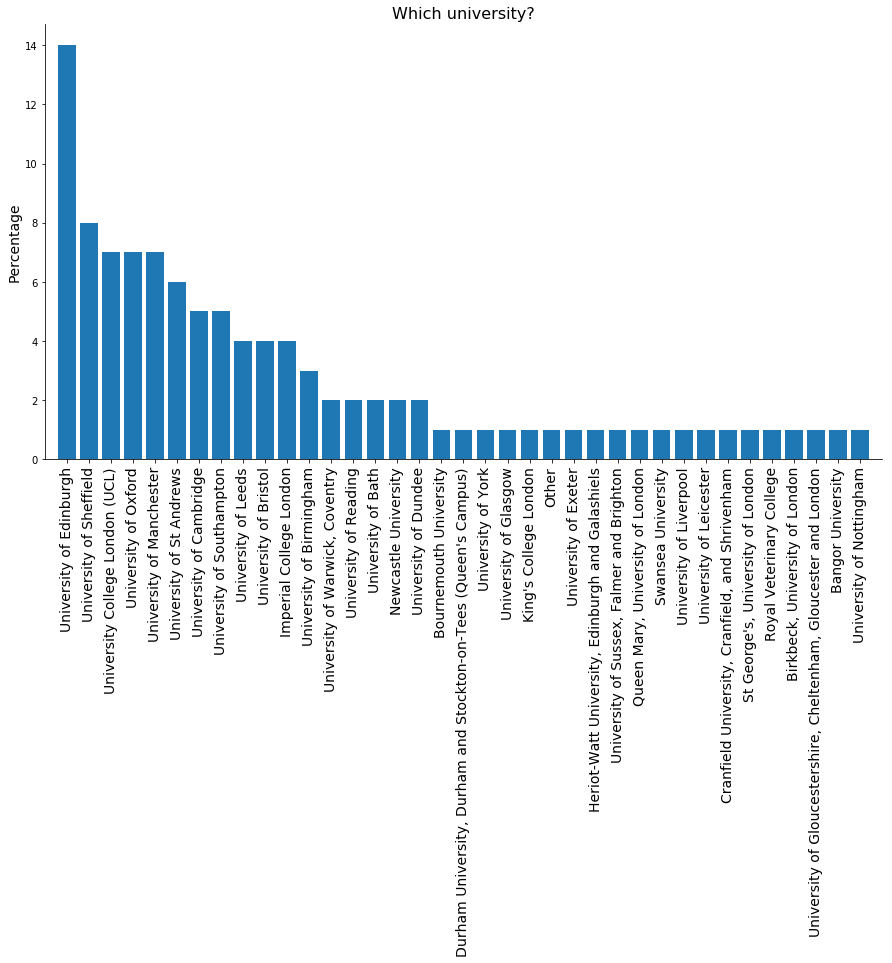

In [67]:
_ = get_plot(perc_to_count, "one choice")

### Which organisation do you work for?

In [68]:
 wc = wordcloud(df, ['currentEmp4. Which organisation do you work for?'])

(-0.5, 1499.5, 799.5, -0.5)

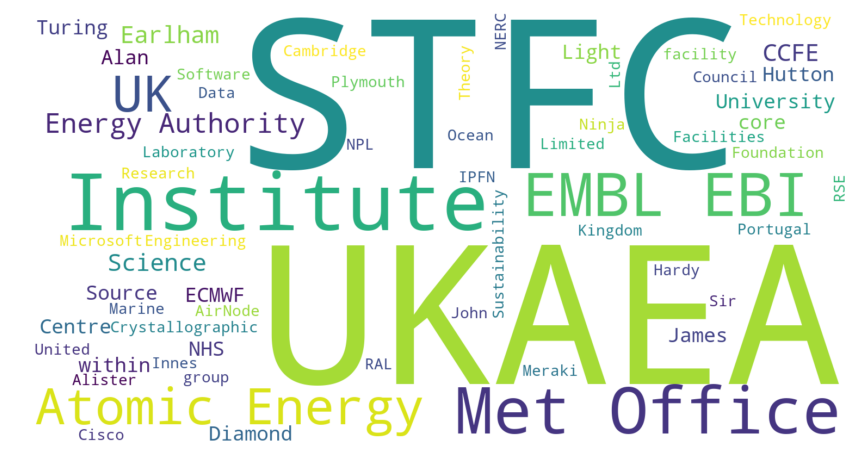

In [69]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### What is your official job title?

In [70]:
data = df['currentEmp5. What is your official job title'].dropna()
data = [i.strip() for i in data if len(i.strip()) > 2]
data = [i.lower().replace('senior', '').replace('post-doctoral', 'postdoctoral').replace('scienitst', 'scientist').strip() for i in data]
print('Number of participants that have a professional qualifications: {}'.format(len(data)))

Number of participants that have a professional qualifications: 242


In [71]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3:
        print(k[0].title(), k[1])

Research Associate 18
Research Software Engineer 17
Research Fellow 16
Software Developer 12
Phd Student 8
Software Engineer 8
Computational Scientist 7
Lecturer 6
Scientific Software Engineer 5
Postdoctoral Research Associate 5
Research Engineer 5
Research Software Developer 4
Computer Officer 3
Research Scientist 3
Applications Consultant 3
Postdoctoral Research Assistant 2
Pdra 2
Software Architect 2
Research Assistant 2
Scientist 2
Scientific Systems Manager 2
Head Of Research Software Development 2
Project Scientist 2
Research Associate In Bioinformatics 1
Technical Researcher 1
Junior Research Software Engineer And Junior Hpc Systems Administrator 1
Software Scientist 1
Data Warehouse Manager 1
Architect 1
Data Manager 1
Developer 1
Research Software Enginnering Specialist 1
Full-Stack Software Engineer 1
Devops Engineer/Systems Administrator 1
Cloud Applications Architect 1
Bioinformatics Developer 1
Software Development Engineer 1
Scientific Programmer 1
Research Software Archi

In [72]:
 wc = wordcloud(df, ['currentEmp5. What is your official job title'])

(-0.5, 1499.5, 799.5, -0.5)

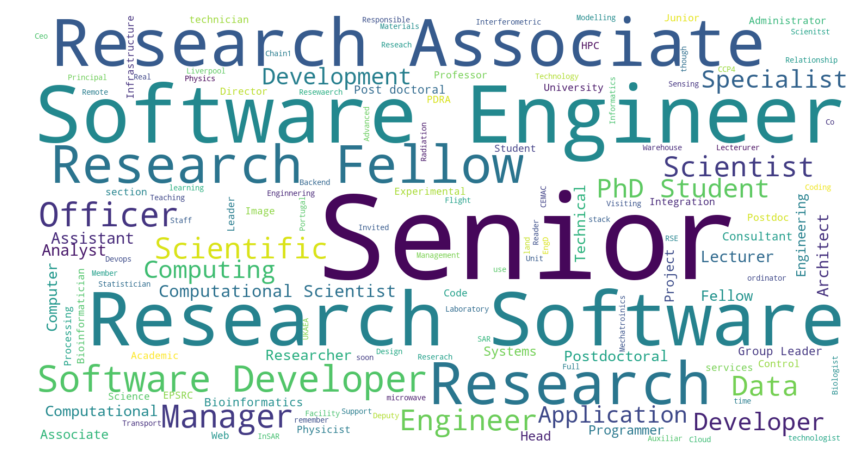

In [73]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Are you known by a different job title? If so, please enter the job title you use

In [74]:
data = df['currentEmp6. Are you known in your group by a different job title? If so, please enter the job title you use'].dropna()
data = [i.strip() for i in data if len(i.strip()) > 2]
print('Number of participants that have a professional qualifications: {}'.format(len(data)))


Number of participants that have a professional qualifications: 50


In [75]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3:
        print(k[0].title(), k[1])

Research Software Engineer 5
Postdoc 4
Research Fellow 3
Software Consultant 2
Bioinformatician 2
Research Associate (Application Programmer) 1
Scientific Programmer 1
Cto, Director Of Possibilities 1
Community Officer 1
Front End Ui/Developer 1
Software Engineer 1
Statistical Programmer 1
R&D Engineer 1
Data Developer 1
Research Assistant 1
Geek 1
Computational Scientist 1
Head Of Research Software Engineering 1
Bioinformatician And Software Developer 1
Application Support 1
Multiphysics Research Fellow 1
Computational Physicist 1
Research Software Developer 1
Research Software Officer 1
Neodaas Manager 1
Senior Data Analyst 1
Researcher 1
Lecturer 1
Site Reliability Engineer 1
Research Computing Consultant Or User Support 1
Research Scientist 1
Cse Team Leader 1
Head Of School 1
Section Leader 1
Control Systems And Software Engineer 1
Data Analyst 1
Software/Operations Engineer 1
Secams Imardis Cto 1
Scientific Software Engineer & Geoinformatician) 1


In [76]:
 wc = wordcloud(df, ['currentEmp6. Are you known in your group by a different job title? If so, please enter the job title you use'])

(-0.5, 1499.5, 799.5, -0.5)

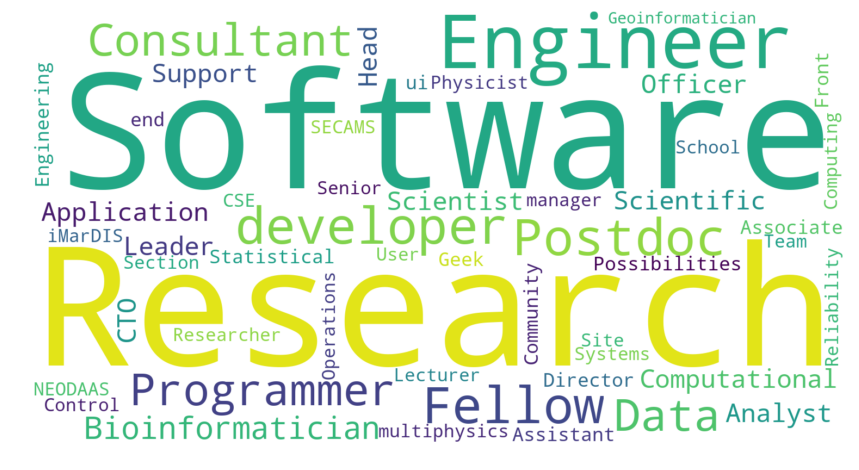

In [77]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### In which disciplines do you work (select as many as apply)

In [78]:
v_to_count, filename  = get_count(df, ['currentEmp13[SQ001]. In which disciplines do you work (select as many as apply)? [Accounting & Finance]', 'currentEmp13[SQ002]. In which disciplines do you work (select as many as apply)? [Aeronautical & Manufacturing Engineering]', 'currentEmp13[SQ003]. In which disciplines do you work (select as many as apply)? [Agriculture & Forestry]', 'currentEmp13[SQ004]. In which disciplines do you work (select as many as apply)? [American Studies]', 'currentEmp13[SQ005]. In which disciplines do you work (select as many as apply)? [Anatomy & Physiology]', 'currentEmp13[SQ006]. In which disciplines do you work (select as many as apply)? [Anthropology]', 'currentEmp13[SQ007]. In which disciplines do you work (select as many as apply)? [Architecture]', 'currentEmp13[SQ008]. In which disciplines do you work (select as many as apply)? [Art & Design]', 'currentEmp13[SQ009]. In which disciplines do you work (select as many as apply)? [Biological Sciences]', 'currentEmp13[SQ010]. In which disciplines do you work (select as many as apply)? [Business & Management Studies]', 'currentEmp13[SQ011]. In which disciplines do you work (select as many as apply)? [Chemical Engineering]', 'currentEmp13[SQ012]. In which disciplines do you work (select as many as apply)? [Chemistry]', 'currentEmp13[SQ013]. In which disciplines do you work (select as many as apply)? [Civil Engineering]', 'currentEmp13[SQ014]. In which disciplines do you work (select as many as apply)? [Classics & Ancient History]', 'currentEmp13[SQ015]. In which disciplines do you work (select as many as apply)? [Communication & Media Studies]', 'currentEmp13[SQ016]. In which disciplines do you work (select as many as apply)? [Complementary Medicine]', 'currentEmp13[SQ017]. In which disciplines do you work (select as many as apply)? [Computer Science]', 'currentEmp13[SQ018]. In which disciplines do you work (select as many as apply)? [Counselling]', 'currentEmp13[SQ019]. In which disciplines do you work (select as many as apply)? [Criminology]', 'currentEmp13[SQ020]. In which disciplines do you work (select as many as apply)? [Dentistry]', 'currentEmp13[SQ021]. In which disciplines do you work (select as many as apply)? [East & South Asian Studies]', 'currentEmp13[SQ022]. In which disciplines do you work (select as many as apply)? [Economics]', 'currentEmp13[SQ023]. In which disciplines do you work (select as many as apply)? [Education]', 'currentEmp13[SQ024]. In which disciplines do you work (select as many as apply)? [Electrical & Electronic Engineering]', 'currentEmp13[SQ025]. In which disciplines do you work (select as many as apply)? [English]', 'currentEmp13[SQ026]. In which disciplines do you work (select as many as apply)? [Fashion]', 'currentEmp13[SQ027]. In which disciplines do you work (select as many as apply)? [Food Science]', 'currentEmp13[SQ028]. In which disciplines do you work (select as many as apply)? [French]', 'currentEmp13[SQ029]. In which disciplines do you work (select as many as apply)? [Geography & Environmental Sciences]', 'currentEmp13[SQ030]. In which disciplines do you work (select as many as apply)? [Geology]', 'currentEmp13[SQ031]. In which disciplines do you work (select as many as apply)? [General Engineering]', 'currentEmp13[SQ032]. In which disciplines do you work (select as many as apply)? [German]', 'currentEmp13[SQ033]. In which disciplines do you work (select as many as apply)? [History]', 'currentEmp13[SQ034]. In which disciplines do you work (select as many as apply)? [History of Art, Architecture & Design]', 'currentEmp13[SQ035]. In which disciplines do you work (select as many as apply)? [Hospitality, Leisure, Recreation & Tourism]', 'currentEmp13[SQ036]. In which disciplines do you work (select as many as apply)? [Iberian Languages/Hispanic Studies]', 'currentEmp13[SQ037]. In which disciplines do you work (select as many as apply)? [Land & Property Management]', 'currentEmp13[SQ038]. In which disciplines do you work (select as many as apply)? [Law]', 'currentEmp13[SQ039]. In which disciplines do you work (select as many as apply)? [Librarianship & Information Management]', 'currentEmp13[SQ040]. In which disciplines do you work (select as many as apply)? [Linguistics]', 'currentEmp13[SQ041]. In which disciplines do you work (select as many as apply)? [Marketing]', 'currentEmp13[SQ042]. In which disciplines do you work (select as many as apply)? [Materials Technology]', 'currentEmp13[SQ043]. In which disciplines do you work (select as many as apply)? [Mathematics]', 'currentEmp13[SQ044]. In which disciplines do you work (select as many as apply)? [Mechanical Engineering]', 'currentEmp13[SQ045]. In which disciplines do you work (select as many as apply)? [Medicine]', 'currentEmp13[SQ046]. In which disciplines do you work (select as many as apply)? [Middle Eastern and African Studies]', 'currentEmp13[SQ047]. In which disciplines do you work (select as many as apply)? [Music]', 'currentEmp13[SQ048]. In which disciplines do you work (select as many as apply)? [Nursing]', 'currentEmp13[SQ049]. In which disciplines do you work (select as many as apply)? [Ophthalmics]', 'currentEmp13[SQ050]. In which disciplines do you work (select as many as apply)? [Pharmacology & Pharmacy]', 'currentEmp13[SQ051]. In which disciplines do you work (select as many as apply)? [Philosophy]', 'currentEmp13[SQ052]. In which disciplines do you work (select as many as apply)? [Physics and Astronomy]', 'currentEmp13[SQ053]. In which disciplines do you work (select as many as apply)? [Physiotherapy]', 'currentEmp13[SQ054]. In which disciplines do you work (select as many as apply)? [Politics]', 'currentEmp13[SQ055]. In which disciplines do you work (select as many as apply)? [Psychology]', 'currentEmp13[SQ056]. In which disciplines do you work (select as many as apply)? [Robotics]', 'currentEmp13[SQ057]. In which disciplines do you work (select as many as apply)? [Russian & East European Languages]', 'currentEmp13[SQ058]. In which disciplines do you work (select as many as apply)? [Social Policy]', 'currentEmp13[SQ059]. In which disciplines do you work (select as many as apply)? [Social Work]', 'currentEmp13[SQ060]. In which disciplines do you work (select as many as apply)? [Sociology]', 'currentEmp13[SQ061]. In which disciplines do you work (select as many as apply)? [Sports Science]', 'currentEmp13[SQ062]. In which disciplines do you work (select as many as apply)? [Theology & Religious Studies]', 'currentEmp13[SQ063]. In which disciplines do you work (select as many as apply)? [Town & Country Planning and Landscape Design]', 'currentEmp13[SQ064]. In which disciplines do you work (select as many as apply)? [Veterinary Medicine]', 'currentEmp13[SQ065]. In which disciplines do you work (select as many as apply)? [Youth Work]'], "multiple choices", "./../../survey_creation/2017/uk/listAnswers/academic_field.csv", "False", "./uk/output/")

In [79]:
perc_to_count = get_percentage(v_to_count, filename)

In [80]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
In which disciplines do you work (select as man...                  
Computer Science                                      112         15
Biological Sciences                                    87         11
Physics and Astronomy                                  80         10
Mathematics                                            42          5
Chemistry                                              39          5
Medicine                                               37          5
Geography & Environmental Sciences                     34          4
Electrical & Electronic Engineering                    25          3
Mechanical Engineering                                 24          3
General Engineering                                    20          3
Materials Technology                                   17          2
Education                                              15          2
Psychology                                             12          2
Chemical Engineering                                   12          2
Civil Engineering                                      12          2
Aeronautical & Manufacturing Engineering               11          1
Geology                                                11          1
Linguistics                                            11          1
Anatomy & Physiology                                   11          1
Librarianship & Information Management                  9          1
Robotics                                                9          1
History                                                 8          1
Architecture                                            8          1
Sociology                                               8          1
Economics                                               8          1
Classics & Ancient History                              7          1
Social Policy                                           7          1
Business & Management Studies                           7          1
Pharmacology & Pharmacy                                 6          1
Agriculture & Forestry                                  6          1
Middle Eastern and African Studies                      5          1
Anthropology                                            5          1
Ophthalmics                                             4          1
Food Science                                            4          1
Theology & Religious Studies                            4          1
Town & Country Planning and Landscape Design            4          1
Communication & Media Studies                           4          1
Art & Design                                            4          1
History of Art, Architecture & Design                   3          0
Law                                                     3          0
Nursing                                                 3          0
Politics                                                2          0
Land & Property Management                              2          0
Philosophy                                              2          0
English                                                 2          0
Physiotherapy                                           1          0
Social Work                                             1          0
Sports Science                                          1          0
Veterinary Medicine                                     1          0
Youth Work                                              1          0
Music                                                   1          0
Marketing                                               1          0
Iberian Languages/Hispanic Studies                      1          0
Hospitality, Leisure, Recreation & Tourism              1          0
German                                                  1          0
French                                                  1          0
Fashion                                           

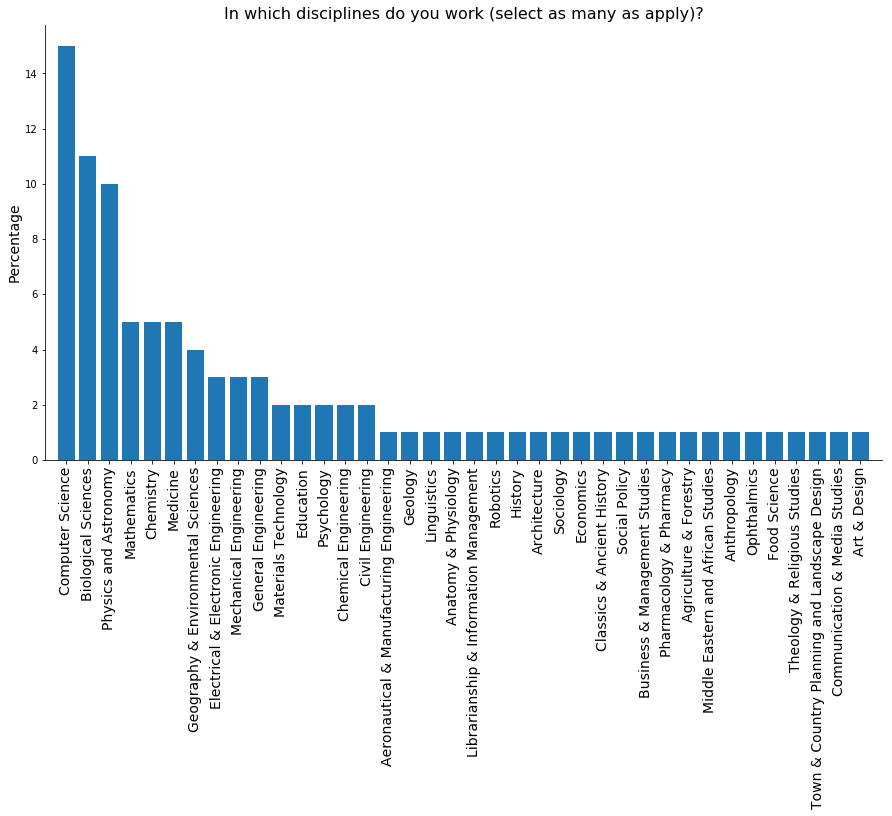

In [81]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 4. Questions about the type of contract


The type of contracts and the fundings are important to understand the situation of RSEs and see if they have stable position in academia.
A vast majority of participants have a full time job (96%) but it is often a fixed term position (36%) or a Permanent position while funding are available (265). Only 30% have a Permanent position funded by the Institution core funding). The average length of contract duration is more or less 3 years for the participants that does not have a permanent position.

For the source of funding, 90% of the participants know the origin of them. 

When we asked the participants which is the origin of their funding for their effort as an RSE/equivalent, 61% claims it comes from Grands and 12% from Industry support. More surprising, 10% of the participants are voluntering their time
For the funding of their current largest project, 69% are funded by Grands and 13% by Industry support. Here, 7% of the projects are not funded and are vulountary. 

The last question about the funding was about the previous project. This helps to see if the funders changed over the time for the participants. The answer is no, the three mains funders were exactly the same with only a slight variation in percentages, the grants accounted for 64% while Industry support for 12% and voluntaring only 5%. There is also 12% of the participants who did not have a project older than 3 years. 

It is important to note that these percentages are not mutually exclusives as the participants had the option to choose several sources of funding for each question.


### Do you work full time or part time

In [82]:
v_to_count, filename  = get_count(df, ['currentEmp12. Do you work full time or part time?'], "one choice", "./../../survey_creation/2017/uk/listAnswers/type_hours.csv", "False", "./uk/output/")

In [83]:
perc_to_count = get_percentage(v_to_count, filename)

In [84]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Do you work full time or part time?                  
Full Time                              242         96
Part-time                               11          4

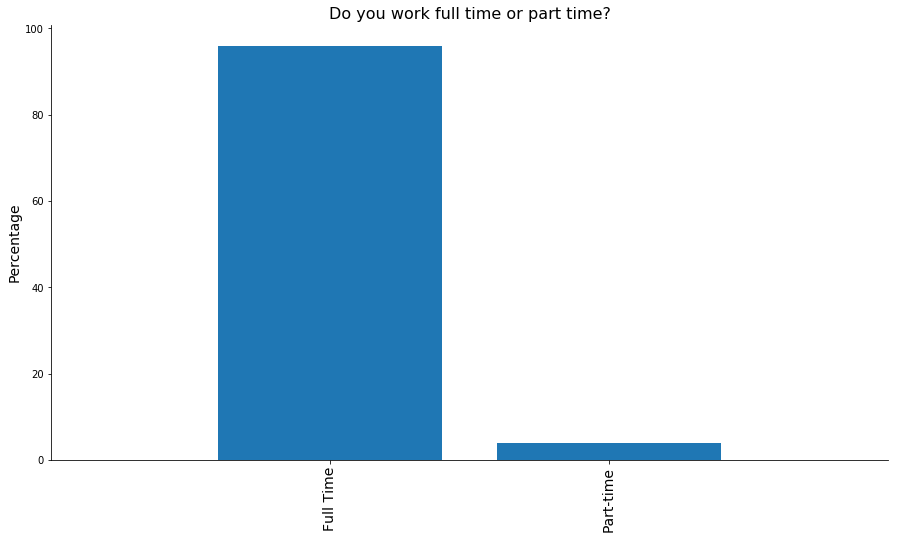

In [85]:
_ = get_plot(perc_to_count, "one choice")

### What type of contract are you employed on?

In [86]:
v_to_count, filename  = get_count(df, ['currentEmp10. What type of contract are you employed on?'], "one choice", "./../../survey_creation/2017/uk/listAnswers/type_contract.csv", "False", "./uk/output/")

In [87]:
perc_to_count = get_percentage(v_to_count, filename)

In [88]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What type of contract are you employed on?                      
Fixed term                                         92         36
Permanent -- funded by University core funding     77         30
Permanent -- as long as funding is available       65         26
Other/Not listed                                   15          6
Agency staff                                        3          1
Freelancer consultant contractor                    1          0

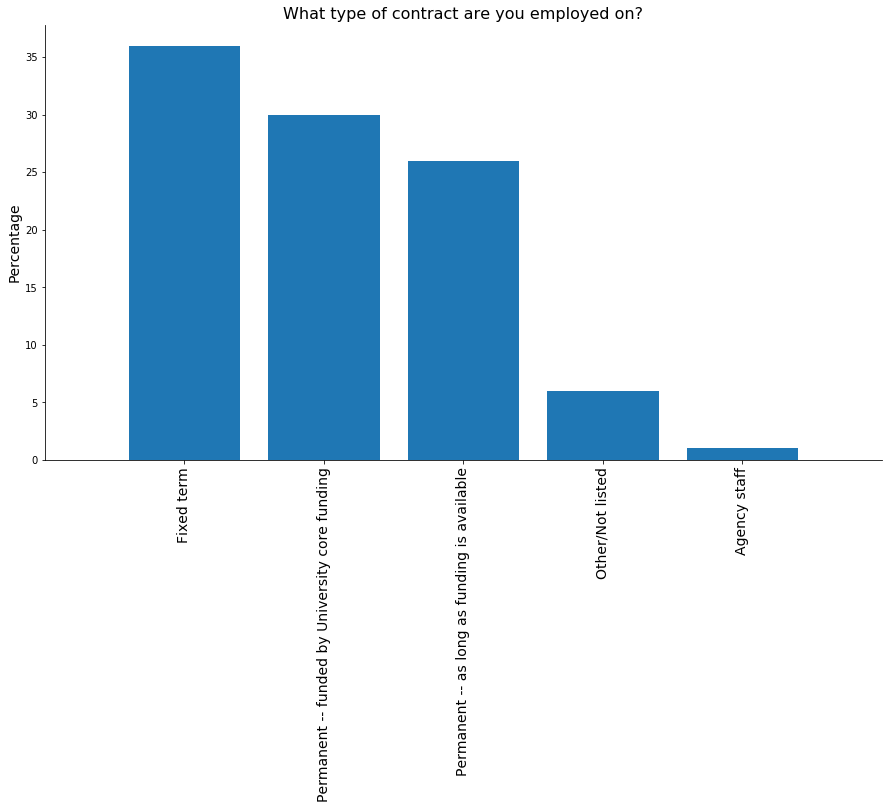

In [89]:
_ = get_plot(perc_to_count, "one choice")

### What is the duration of your current contract?

In [90]:
v_to_count, filename  = get_count(df, ['currentEmp11. What is the duration of your current contract in months?'], "freenumeric", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

       currentEmp11. What is the duration of your current contract in months?
count                                          92.000000                     
mean                                           31.385870                     
std                                            15.376431                     
min                                             1.500000                     
25%                                            20.250000                     
50%                                            36.000000                     
75%                                            36.000000                     
max                                            72.000000                     


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


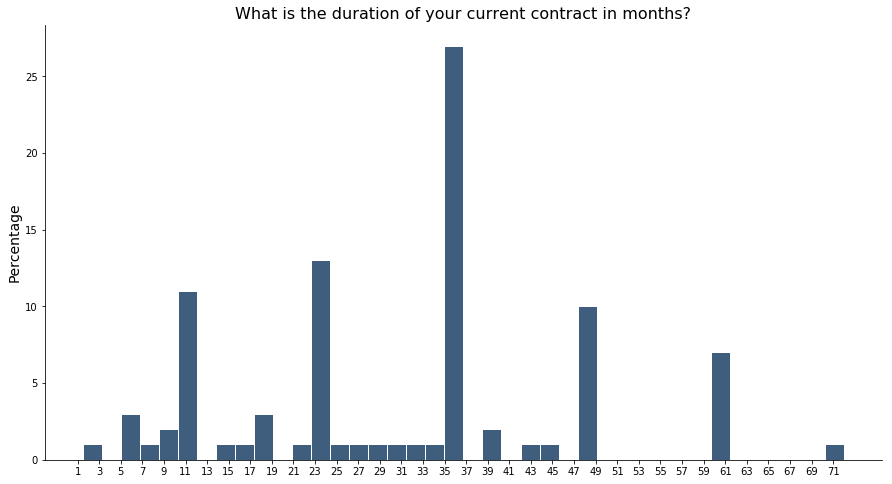

In [91]:
_ = get_plot(v_to_count, "freenumeric")

### Do you know the source of the funding used to support you and your current, largest project?

In [92]:
v_to_count, filename  = get_count(df, ['fund1. Do you know the source of the funding used to support you and your current, largest project?'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [93]:
perc_to_count = get_percentage(v_to_count, filename)

In [94]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you know the source of the funding used to s...                            
 Do you know the source of the funding used to ...          199          23   

                                                    NaN value  \
Do you know the source of the funding used to s...              
 Do you know the source of the funding used to ...         31   

                                                   Yes [Percentage]  \
Do you know the source of the funding used to s...                    
 Do you know the source of the funding used to ...               90   

                                                   No [Percentage]  
Do you know the source of the funding used to s...                  
 Do you know the source of the funding used to ...              10

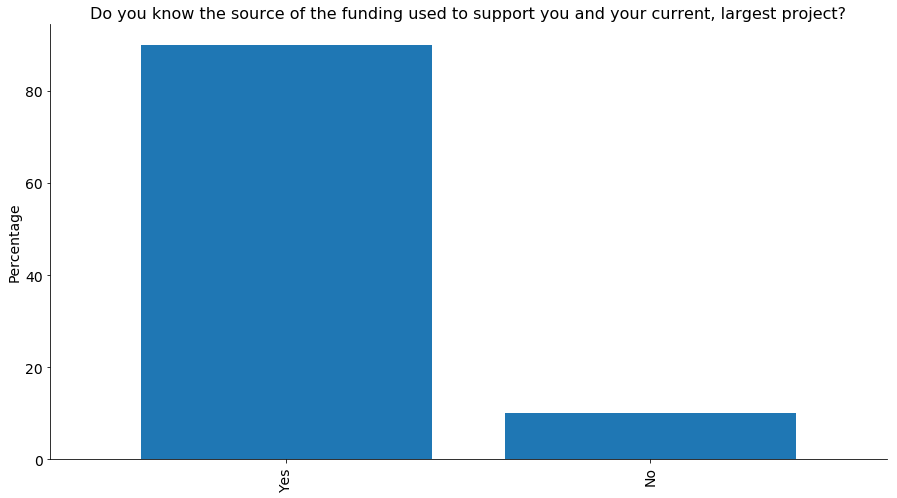

In [95]:
_ = get_plot(perc_to_count, "y/n/na")

### Which of the following sources are used to pay for your effort as an RSE/equivalent?

In [96]:
v_to_count, filename  = get_count(df, ['fund2[SQ001]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [I volunteer my time]', 'fund2[SQ002]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Donation button]', 'fund2[SQ003]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (one-time)]', 'fund2[SQ004]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (recurring)]', 'fund2[SQ005]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Books & merchandise]', 'fund2[SQ006]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Advertising & sponsorships]', 'fund2[SQ007]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Industry support]', 'fund2[SQ008]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Consulting & services]', 'fund2[SQ009]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Grants]', 'fund2[SQ010]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [SaaS]', 'fund2[SQ011]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Membership]', 'fund2[SQ012]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Dual license]', 'fund2[SQ013]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Open core]', 'fund2[SQ014]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Foundations & consortiums]', 'fund2[SQ015]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Venture capital]', 'fund2[SQ016]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Trademark licensing & franchising]'], "multiple choices", "./../../survey_creation/2017/uk/listAnswers/funding.csv", "False", "./uk/output/")

In [97]:
perc_to_count = get_percentage(v_to_count, filename)

In [98]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which of the following sources are used to pay ...                  
Grants                                                163         61
Industry support                                       33         12
I volunteer my time                                    27         10
Consulting & services                                  17          6
Open core                                               7          3
Foundations & consortiums                               6          2
Trademark licensing & franchising                       3          1
SaaS                                                    2          1
Membership                                              2          1
Dual license                                            2          1
Crowdfunding (one-time)                                 1          0
Books & merchandise                                     1          0
Advertising & sponsorships                              1          0
Venture capital                                         1          0
Donation button                                         0          0
Crowdfunding (recurring)                                0          0

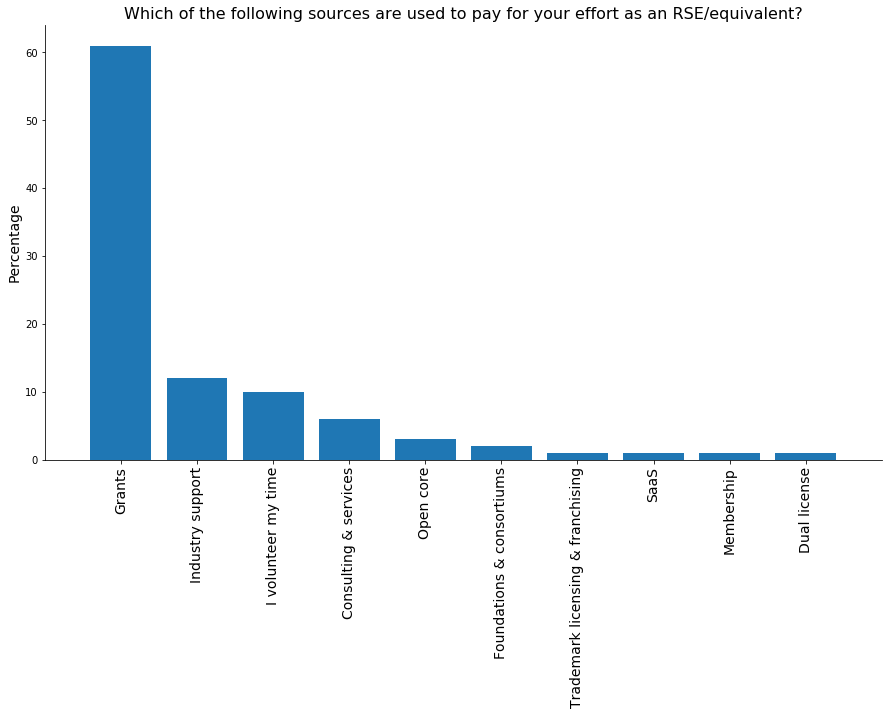

In [99]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources are used to fund your current, largest project?

In [100]:
v_to_count, filename  = get_count(df, ['fund3[SQ001]. Which of the following sources are used to fund your current, largest project? [Volunteers]', 'fund3[SQ002]. Which of the following sources are used to fund your current, largest project? [Donation button]', 'fund3[SQ003]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (one-time)]', 'fund3[SQ004]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (recurring)]', 'fund3[SQ005]. Which of the following sources are used to fund your current, largest project? [Books & merchandise]', 'fund3[SQ006]. Which of the following sources are used to fund your current, largest project? [Advertising & sponsorships]', 'fund3[SQ007]. Which of the following sources are used to fund your current, largest project? [Industry support]', 'fund3[SQ008]. Which of the following sources are used to fund your current, largest project? [Consulting & services]', 'fund3[SQ009]. Which of the following sources are used to fund your current, largest project? [Grants]', 'fund3[SQ010]. Which of the following sources are used to fund your current, largest project? [SaaS]', 'fund3[SQ011]. Which of the following sources are used to fund your current, largest project? [Membership]', 'fund3[SQ012]. Which of the following sources are used to fund your current, largest project? [Dual license]', 'fund3[SQ013]. Which of the following sources are used to fund your current, largest project? [Open core]', 'fund3[SQ014]. Which of the following sources are used to fund your current, largest project? [Foundations & consortiums]', 'fund3[SQ015]. Which of the following sources are used to fund your current, largest project? [Venture capital]', 'fund3[SQ016]. Which of the following sources are used to fund your current, largest project? [Trademark licensing & franchising]'], "multiple choices", "./../../survey_creation/2017/uk/listAnswers/funding.csv", "False", "./uk/output/")

In [101]:
perc_to_count = get_percentage(v_to_count, filename)

In [102]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which of the following sources are used to fund...                  
Grants                                                157         69
Industry support                                       30         13
Volunteers                                             15          7
Consulting & services                                   8          4
Foundations & consortiums                               5          2
Membership                                              2          1
Dual license                                            2          1
Open core                                               2          1
Trademark licensing & franchising                       2          1
Donation button                                         1          0
Crowdfunding (one-time)                                 1          0
SaaS                                                    1          0
Venture capital                                         1          0
Crowdfunding (recurring)                                0          0
Books & merchandise                                     0          0
Advertising & sponsorships                              0          0

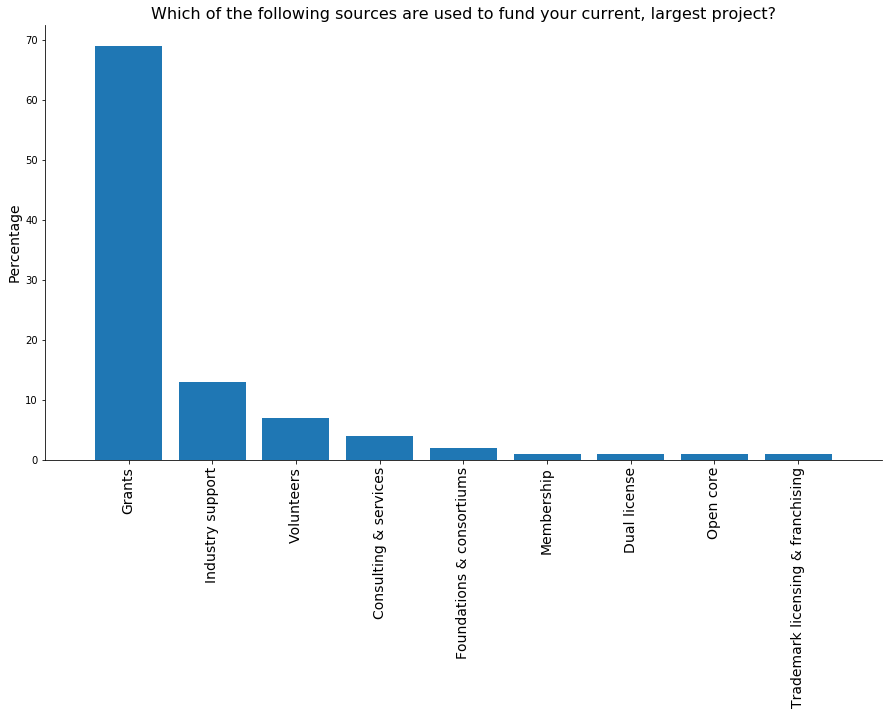

In [103]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources were used to fund your current, largest project three years ago?

In [104]:
v_to_count, filename  = get_count(df, ['fund4[SQ017]. Which of the following sources were used to fund your current, largest project three years ago? [My previous project is less than 3 years old]', 'fund4[SQ001]. Which of the following sources were used to fund your current, largest project three years ago? [Volunteers]', 'fund4[SQ002]. Which of the following sources were used to fund your current, largest project three years ago? [Donation button]', 'fund4[SQ003]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (one-time)]', 'fund4[SQ004]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (recurring)]', 'fund4[SQ005]. Which of the following sources were used to fund your current, largest project three years ago? [Books & merchandise]', 'fund4[SQ006]. Which of the following sources were used to fund your current, largest project three years ago? [Advertising & sponsorships]', 'fund4[SQ007]. Which of the following sources were used to fund your current, largest project three years ago? [Industry support]', 'fund4[SQ008]. Which of the following sources were used to fund your current, largest project three years ago? [Consulting & services]', 'fund4[SQ009]. Which of the following sources were used to fund your current, largest project three years ago? [Grants]', 'fund4[SQ010]. Which of the following sources were used to fund your current, largest project three years ago? [SaaS]', 'fund4[SQ011]. Which of the following sources were used to fund your current, largest project three years ago? [Membership]', 'fund4[SQ012]. Which of the following sources were used to fund your current, largest project three years ago? [Dual license]', 'fund4[SQ013]. Which of the following sources were used to fund your current, largest project three years ago? [Open core]', 'fund4[SQ014]. Which of the following sources were used to fund your current, largest project three years ago? [Foundations & consortiums]', 'fund4[SQ015]. Which of the following sources were used to fund your current, largest project three years ago? [Venture capital]', 'fund4[SQ016]. Which of the following sources were used to fund your current, largest project three years ago? [Trademark licensing & franchising]'], "multiple choices", "./../../survey_creation/2017/uk/listAnswers/funding.csv", "False", "./uk/output/")

In [105]:
perc_to_count = get_percentage(v_to_count, filename)

In [106]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Which of the following sources were used to fun...                  
Grants                                                127         64
My previous project is less than 3 years old           24         12
Industry support                                       23         12
Volunteers                                             10          5
Consulting & services                                   6          3
Dual license                                            2          1
Open core                                               2          1
Advertising & sponsorships                              1          1
SaaS                                                    1          1
Foundations & consortiums                               1          1
Venture capital                                         1          1
Trademark licensing & franchising                       1          1
Books & merchandise                                     0          0
Crowdfunding (recurring)                                0          0
Crowdfunding (one-time)                                 0          0
Donation button                                         0          0
Membership                                              0          0

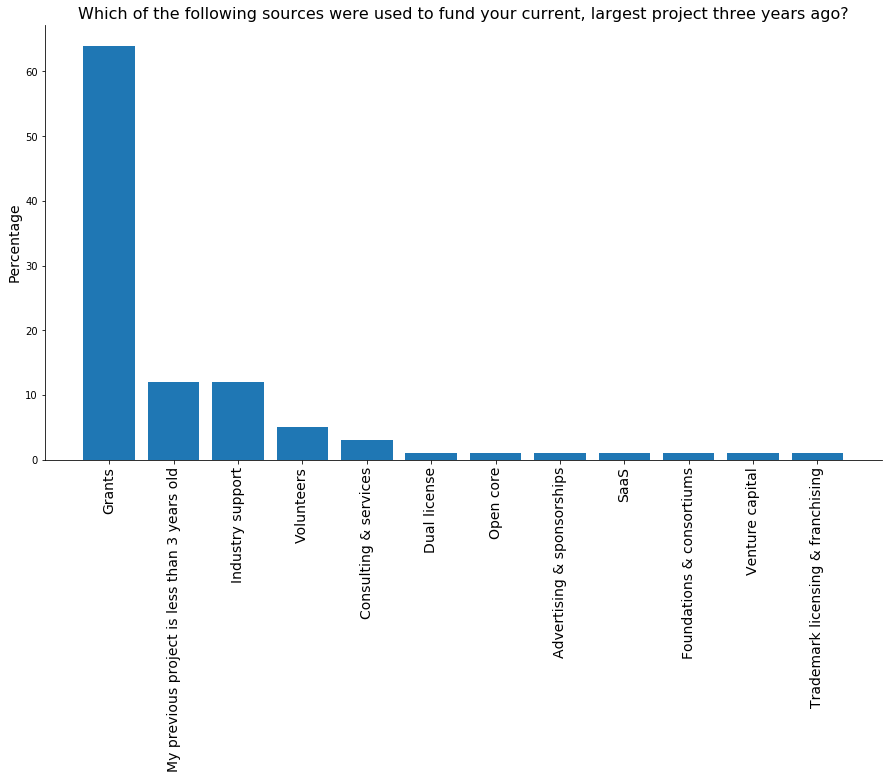

In [107]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 5. Questions about previous employment
Several questions were about the participants previous job. The idea is to collect insights of their career path and understand what are their motivations to be an RSE.

Almost half of the participants worked in a university prior to their current position (49%). The others come from private sector (26%) or it is their first job (11%).

We asked the participants to rank the reasons why they chose their actual position among 8 different ones:
* Desire to work in a research environment
* Freedom to choose own working practices
* Desire to advance research
* I want to learn new skills
* Opportunity to develop software
* Flexible working hours
* Ability to work across disciplines
* Opportunity for career advancement
* The salary

It appears that the *Desire to work in a research environment*, the *Desire to advance research* and the *Opportunity to develop software* are more often ranked as the first reasons than any other ones. On the contraries, *the salary* is the least common reason for choosing a position as RSE.

### Where was your previous job based?

In [108]:
v_to_count, filename  = get_count(df, ['prevEmp1. Where was your previous job based?'], "one choice", "./../../survey_creation/2017/uk/listAnswers/previous_job.csv", "False", "./uk/output/")

In [109]:
perc_to_count = get_percentage(v_to_count, filename)

In [110]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Where was your previous job based?                  
University                            121         49
Private company                        64         26
This is my first job                   27         11
National laboratory                    16          7
Other                                   8          3
Government                              8          3
NGO                                     2          1
NaN                                     7        NaN

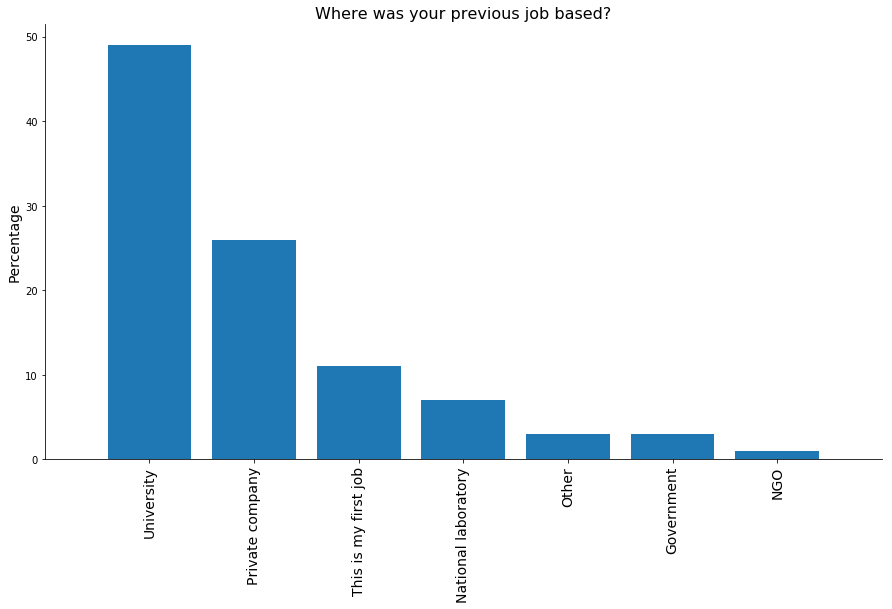

In [111]:
_ = get_plot(perc_to_count, "one choice")

### Rank the following factors dependent on how strongly they influenced your decision to accept your current position

In [112]:
v_to_count, filename  = get_count(df, ['prevEmp2[1]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 1]', 'prevEmp2[2]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 2]', 'prevEmp2[3]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 3]', 'prevEmp2[4]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 4]', 'prevEmp2[5]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 5]', 'prevEmp2[6]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 6]', 'prevEmp2[7]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 7]', 'prevEmp2[8]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 8]'], "ranking", "./../../survey_creation/2017/uk/listAnswers/reason_leave_job.csv", "False", "./uk/output/")

In [113]:
perc_to_count = get_percentage(v_to_count, filename)

In [114]:
display_side_by_side(v_to_count,perc_to_count)

Rank 1 [Count]  Rank 2 [Count]  \
Reasons to choose this job                                                 
Desire to work in a research environment              55              39   
Desire to advance research                            38              38   
Opportunity to develop software                       32              33   
I want to learn new skills                            27              28   
Freedom to choose own working practices               23              19   
Opportunity for career advancement                    20              23   
Ability to work across disciplines                    15              31   
Flexible working hours                                14              14   
The salary                                             9               5   
NaN                                                   20              23   

                                          Rank 3 [Count]  Rank 4 [Count]  \
Reasons to choose this job                                                 
Desire to work in a research environment              38              30   
Desire to advance research                            41              21   
Opportunity to develop software                       26              25   
I want to learn new skills                            23              31   
Freedom to choose own working practices               28              22   
Opportunity for career advancement                    16              14   
Ability to work across disciplines                    27              21   
Flexible working hours                                13              27   
The salary                                             9              15   
NaN                                                   32              47   

                                          Rank 5 [Count]  Rank 6 [Count]  \
Reasons to choose this job                                                 
Desire to work in a research environment              15               6   
Desire to advance research                            24              15   
Opportunity to develop software                       24              10   
I want to learn new skills                            23              20   
Freedom to choose own working practices               21              18   
Opportunity for career advancement                    14              18   
Ability to work across disciplines                    17              21   
Flexible working hours                                23              19   
The salary                                            13              16   
NaN                                                   79             110   

                                          Rank 7 [Count]  Rank 8 [Count]  \
Reasons to choose this job                                                 
Desire to work in a research environment               5             2.0   
Desire to advance research                             9             NaN   
Opportunity to develop software                       12            10.0   
I want to learn new skills                            11             6.0   
Freedom to choose own working practices               20             6.0   
Opportunity for career advancement                    16            17.0   
Ability to work across disciplines                     6             8.0   
Flexible working hours                                16            23.0   
The salary                                            27            20.0   
NaN                                                  131           161.0   

                                         Rank 1 [Percentage]  \
Reasons to choose this job                                     
Desire to work in a research environment                  29   
Desire to advance research                                20   
Opportunity to develop software                           19   
I want to learn new skills                                16   
Freedo

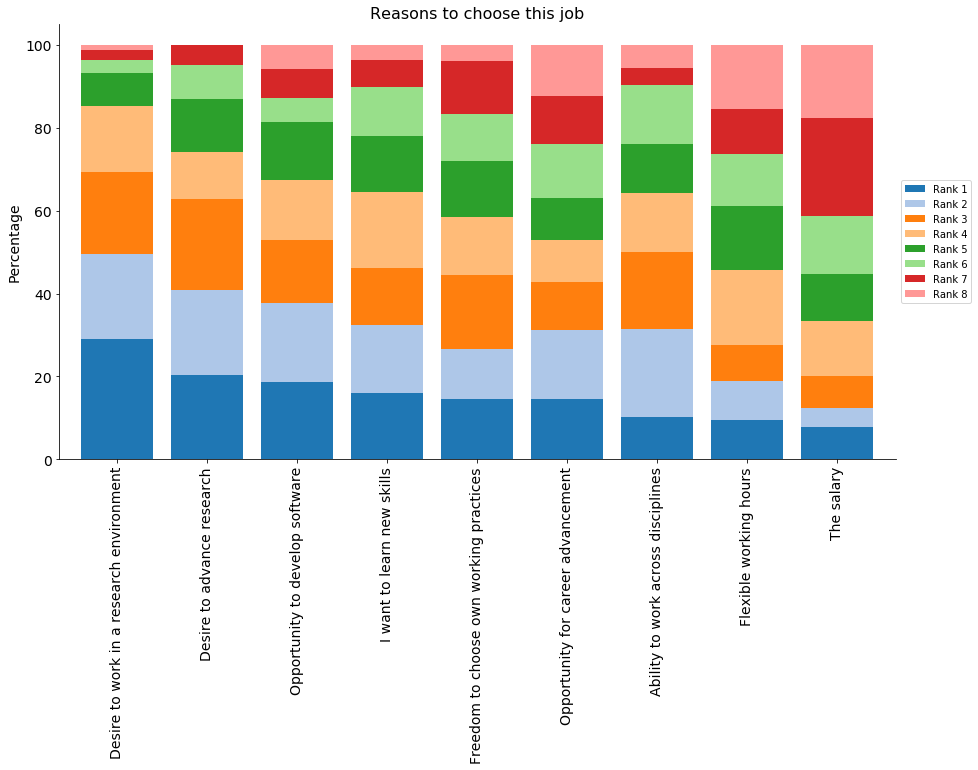

In [115]:
_ = get_plot(perc_to_count, "ranking")

# Section 6. Collaboration and training

RSEs by definition, work for others. Their role involves writing code that is used by others (as seen in section 2), but the collaboration can take other forms. This is why we asked with whom the participants work with. Usually, they seems to be embedded in a stable group, 52% of them report to work with the same researchers, while a minority has a more flexible collaboration (48%).
On the side of collaboration, we wanted to know if they were working within a Research Software Engineer group. It is the case half of them.
On average they work on 4 different projects at the same time. 

RSEs have programming skills that is not necessarily shared within their field. Therefore, they can train other researchers to develop some best practices or learn how to program more efficiently. 65% of them participate to such training. They are not teaching directly to students (as seen in section 2) but transferring skills is an important aspect of their job. In average, they do training three times a year. These trainings are more often done under the form of workshop than traditional teaching and often do it as Software/Data Carpentry workshop or local university Training. A type of training probably more adapted to teach computing skills.

## Collaboration

### Do you work for a Research Software Group?

In [116]:
v_to_count, filename  = get_count(df, ['currentWork2. Do you work for a Research Software Group?'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [117]:
perc_to_count = get_percentage(v_to_count, filename)

In [118]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you work for a Research Software Group?                             
 Do you work for a Research Software Group?           59          58   

                                             NaN value Yes [Percentage]  \
Do you work for a Research Software Group?                                
 Do you work for a Research Software Group?        136               50   

                                            No [Percentage]  
Do you work for a Research Software Group?                   
 Do you work for a Research Software Group?              50

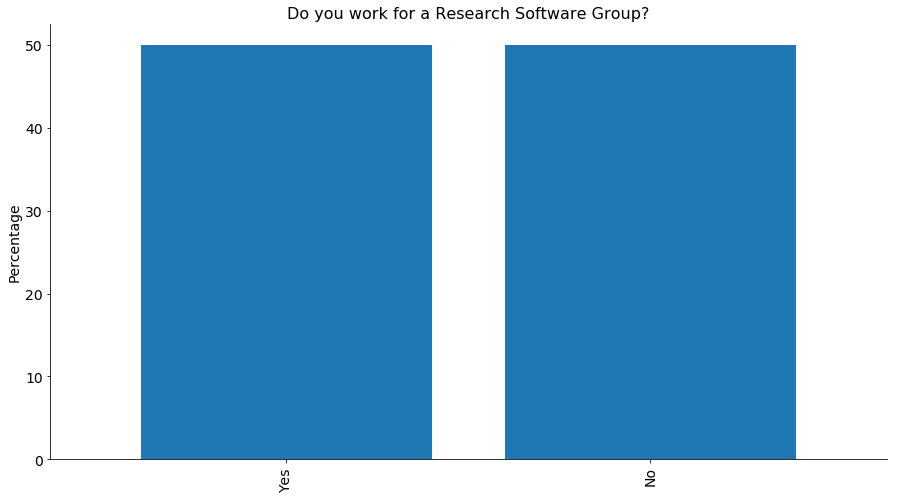

In [119]:
_ = get_plot(perc_to_count, "y/n/na")

### Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?

In [120]:
v_to_count, filename  = get_count(df, ['currentWork1. Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?'], "one choice", "./../../survey_creation/2017/uk/listAnswers/work_researchers.csv", "False", "./uk/output/")

In [121]:
perc_to_count = get_percentage(v_to_count, filename)

In [122]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
Do you always work with the same researcher(s),...                  
Regularly change researcher(s)                        122         52
Same researcher(s)                                    113         48
NaN                                                    18        NaN

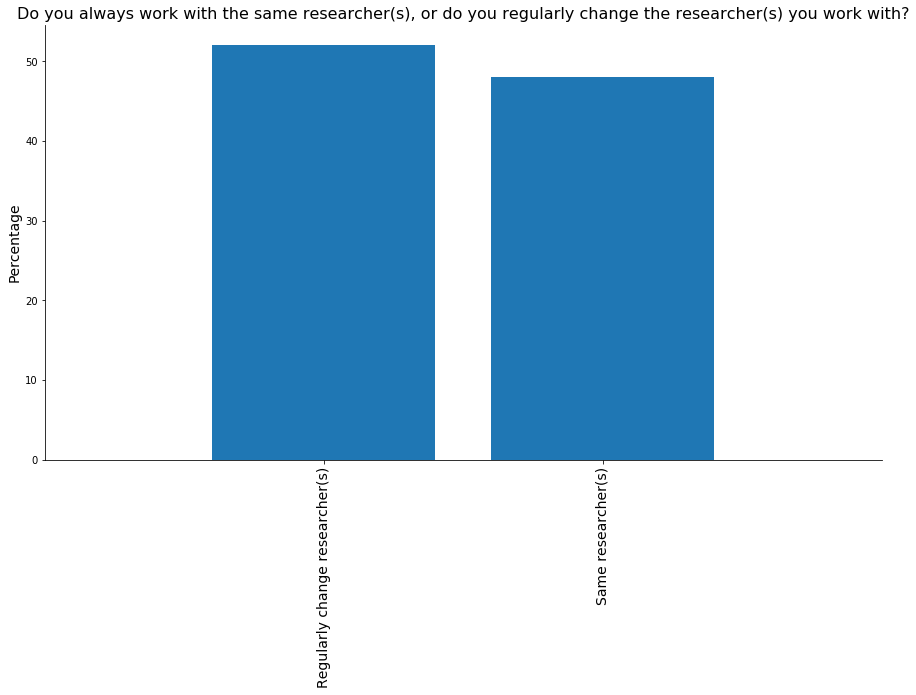

In [123]:
_ = get_plot(perc_to_count, "one choice")

### How many software projects are you currently involved in?

In [124]:
v_to_count, filename  = get_count(df, ['proj1can. How many software projects are you currently involved with?'], "freenumeric", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

       proj1can. How many software projects are you currently involved with?
count                                         222.000000                    
mean                                            3.959459                    
std                                             4.226952                    
min                                             0.000000                    
25%                                             2.000000                    
50%                                             3.000000                    
75%                                             5.000000                    
max                                            50.000000                    


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


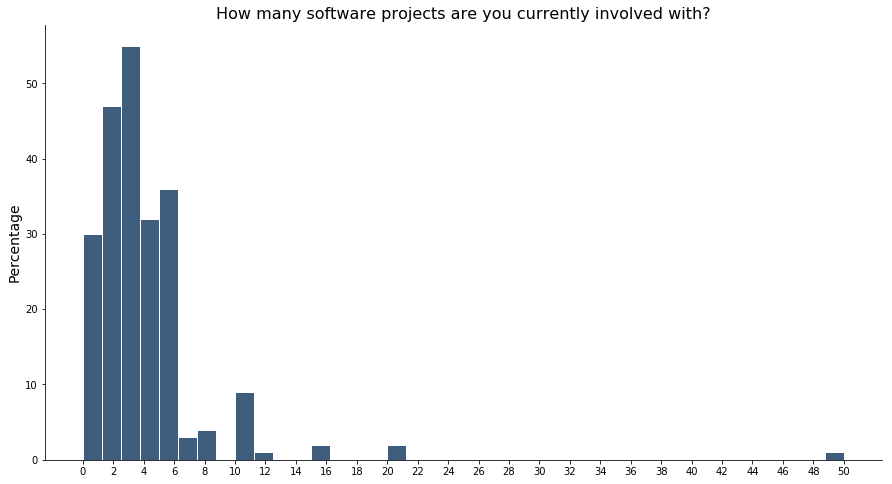

In [125]:
_ = get_plot(v_to_count, "freenumeric")

## Training

### Have you ever trained researchers in computational techniques?

In [126]:
v_to_count, filename  = get_count(df, ['train1. Have you ever trained researchers in computational techniques?'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [127]:
perc_to_count = get_percentage(v_to_count, filename)

In [128]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever trained researchers in computatio...                            
 Have you ever trained researchers in computati...          152          82   

                                                    NaN value  \
Have you ever trained researchers in computatio...              
 Have you ever trained researchers in computati...         19   

                                                   Yes [Percentage]  \
Have you ever trained researchers in computatio...                    
 Have you ever trained researchers in computati...               65   

                                                   No [Percentage]  
Have you ever trained researchers in computatio...                  
 Have you ever trained researchers in computati...              35

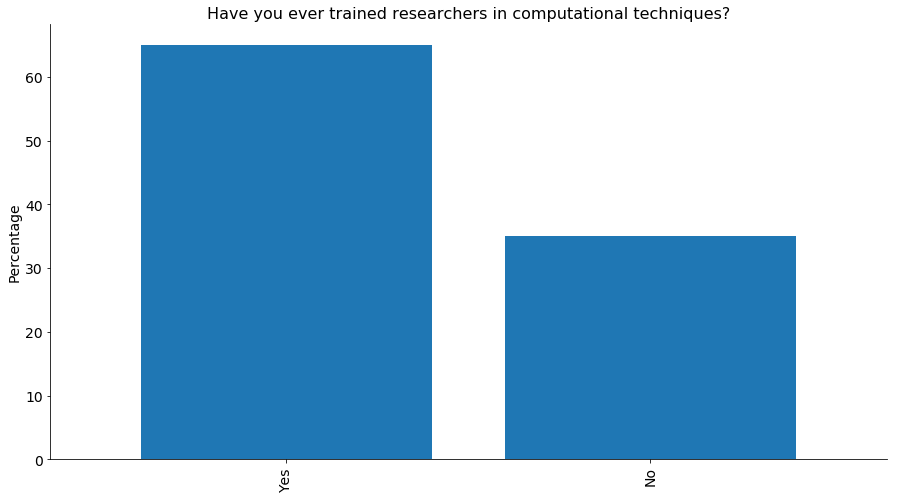

In [129]:
_ = get_plot(perc_to_count, "y/n/na")

### On average, how many times a year do you take part in providing training?

In [130]:
v_to_count, filename  = get_count(df, ['train2. On average, how many times a year do you take part in providing training?'], "freenumeric", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

       train2. On average, how many times a year do you take part in providing training?
count                                         146.000000                                
mean                                            3.431507                                
std                                             4.071613                                
min                                             0.000000                                
25%                                             2.000000                                
50%                                             2.000000                                
75%                                             4.000000                                
max                                            30.000000                                


/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


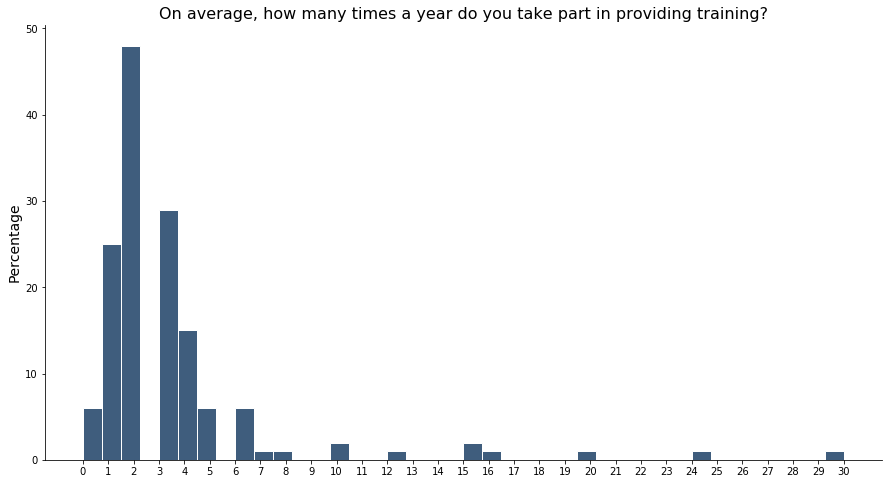

In [131]:
_ = get_plot(v_to_count, "freenumeric")

### What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)

In [132]:
data = df['train3. What training programs are you involved with (comma separated list)?'].dropna()
data = [z.replace('/', ',').replace(';', ',').strip().lower() for z in data]
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
data = [ ''.join(i for i in s if not i.isdigit()).strip() for s in data if len(s) < 50 and s not in ['none']]
print('There are {} propositions'.format(len(data)))

There are 234 propositions


In [133]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3 and k[1] >1:
        print(k[0].title(), k[1])

Software Carpentry 40
Local University Training 21
Data Carpentry 12
Local Training 6
Workshops 4
Local 3
Python 3
University Training 2
Linux 2
Fortran 2
Archer Training 2
Internal Workshops 2
Local Institute Training 2
Summer School 2


In [134]:
 wc = wordcloud(df, ['train3. What training programs are you involved with (comma separated list)?'])

(-0.5, 1499.5, 799.5, -0.5)

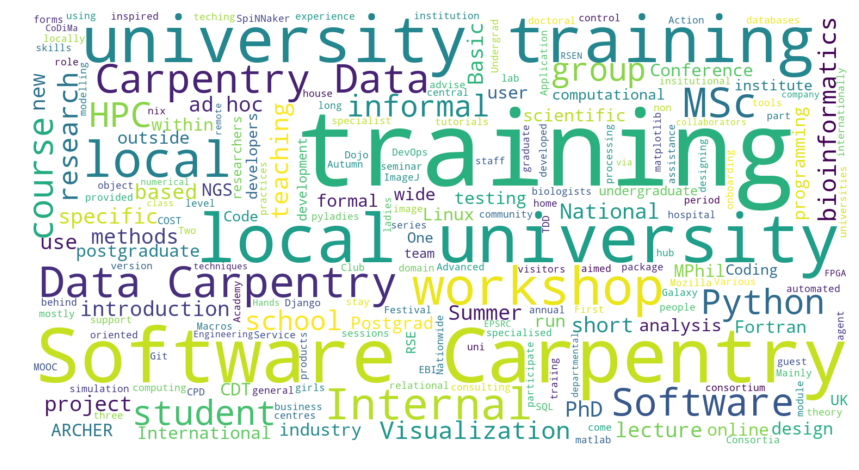

In [135]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 7. Publications

RSEs is an hybrid role between a researcher and a software developer. We investigated both of these aspects concerning publication and dissemination of their work, one on the traditional aspect of it (publications and conference) and on the more software aspect (open source and DOI).
One essential aspect of career in academia is the publications and the conferences to gain recognition. However, the role of RSE being less about writing articles than creating the infrastructure and the software for the article to exist, there is some fear that they will fail to have recognition through the papers and conferences.
Our results support this idea, while for 91% of the participants, their software is used in published researches they are only 78% (among them) who are acknowledged in the publication.

Among these participants that are acknowledged in the paper, only 36% are generally named as main author for the paper. Among the 64% of those who are not main author, 86% are at least mentioned as co-authors. And among these last 24% of RSEs that are not mentioned as co-author or main author, 92% are at least generally acknowledged in the main text of the paper.
On conference, the number of RSEs that present their work in conference is rather small, only 57%, when compared to the paper publications.


One important development practice is how the code is distributed and if the RSEs are releasing their work under open licence.
We asked the participants if they have ever released their work under open source licence and 68% of them replied by the affirmative. However, as it could be considered as a small number, among these 68%, 48% are doing it all the time and 43% Very often. Therefore, as soon as the step into open source is done, RSEs seems to have a constant interest for it. However, they rarely use a Digital Object Identifier (DOI) to help to identify their software, only 2% of them are doing it. And the frequency of use of the DOI among them is much more variable than for the open licence.

## Academic publications

### Has your software contributed to research that has been published in a journal or at a conference?; In general, when your software contributes to a paper, are you acknowledged in that paper?; Are you generally named as the main author of the paper?; Are you generally named as a co-author of the paper?; Are you generally acknowledged in the main text of the paper?

In [136]:
v_to_count, filename  = get_count(df, ['paper1. Has your software contributed to research that has been published in a journal or at a conference?', 'paper2. In general, when your software contributes to a paper, are you acknowledged in that paper?', 'paper3. Are you generally named as the main author of the paper?', 'paper4. Are you generally named as a co-author of the paper?', 'paper5. Are you generally acknowledged in the main text of the paper?'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [137]:
perc_to_count = get_percentage(v_to_count, filename)

In [138]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Publications                                                                  
 Has your software contributed to research that...          199          20   
 In general, when your software contributes to ...          139          40   
 Are you generally named as the main author of ...           49          86   
 Are you generally named as a co-author of the ...           76          12   
 Are you generally acknowledged in the main tex...           11           1   

                                                    NaN value  \
Publications                                                    
 Has your software contributed to research that...         34   
 In general, when your software contributes to ...         74   
 Are you generally named as the main author of ...        118   
 Are you generally named as a co-author of the ...        165   
 Are you generally acknowledged in the main tex...        241   

                                                   Yes [Percentage]  \
Publications                                                          
 Has your software contributed to research that...               91   
 In general, when your software contributes to ...               78   
 Are you generally named as the main author of ...               36   
 Are you generally named as a co-author of the ...               86   
 Are you generally acknowledged in the main tex...               92   

                                                   No [Percentage]  
Publications                                                        
 Has your software contributed to research that...               9  
 In general, when your software contributes to ...              22  
 Are you generally named as the main author of ...              64  
 Are you generally named as a co-author of the ...              14  
 Are you generally acknowledged in the main tex...               8

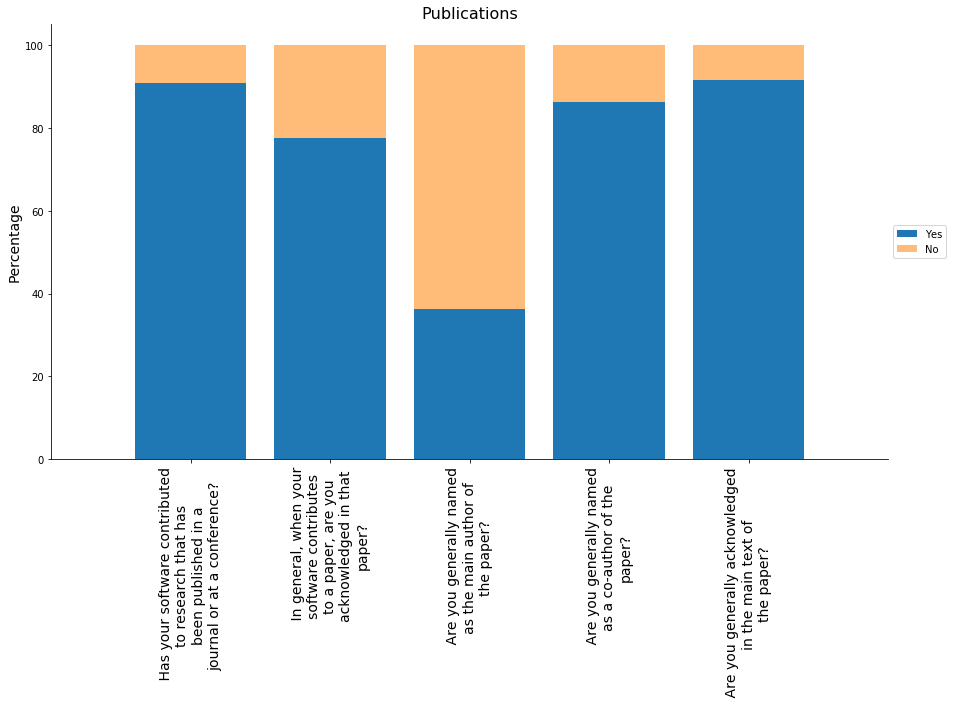

In [139]:
_ = get_plot(perc_to_count, "y/n/na")

### Have you ever presented your software work at a conference or workshop?

In [140]:
v_to_count, filename  = get_count(df, ['conf1can. Have you ever presented your software work at a conference or workshop?'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [141]:
perc_to_count = get_percentage(v_to_count, filename)

In [142]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever presented your software work at a...                            
 Have you ever presented your software work at ...          134         101   

                                                    NaN value  \
Have you ever presented your software work at a...              
 Have you ever presented your software work at ...         18   

                                                   Yes [Percentage]  \
Have you ever presented your software work at a...                    
 Have you ever presented your software work at ...               57   

                                                   No [Percentage]  
Have you ever presented your software work at a...                  
 Have you ever presented your software work at ...              43

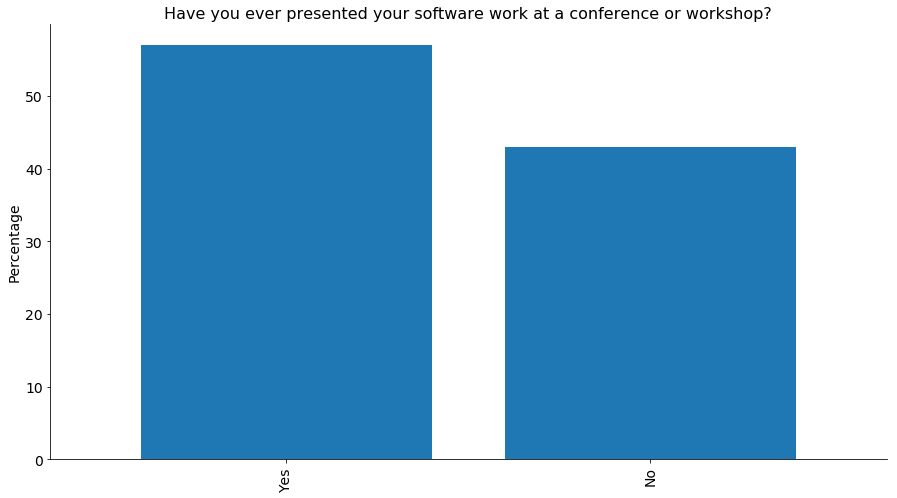

In [143]:
_ = get_plot(perc_to_count, "y/n/na")

### Which conference(s)/workshop(s)

In [144]:
data = df['conf2can. Which conferences or workshops?'].dropna()
data = [z.replace('/', ',').replace(';', ',').strip().lower() for z in data]
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
data = [ ''.join(i for i in s if not i.isdigit()).strip() for s in data if len(s) < 50 and s not in ['none']]
print('There are {} propositions'.format(len(data)))

There are 213 propositions


In [145]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3 and k[1] > 1:
        print(k[0].title(), k[1])

Euroscipy 3
Nobugs 2
Ieee Escience 2
Parco 2
Easc 2
Supercomputing 2
European Geophysical Union 2
Wssspe 2
Pasco 2
Issac 2
Rspsoc 2
Ismb 2
Icnsp 2
American Chemical Society 2


In [146]:
 wc = wordcloud(df, ['conf2can. Which conferences or workshops?'])

(-0.5, 1499.5, 799.5, -0.5)

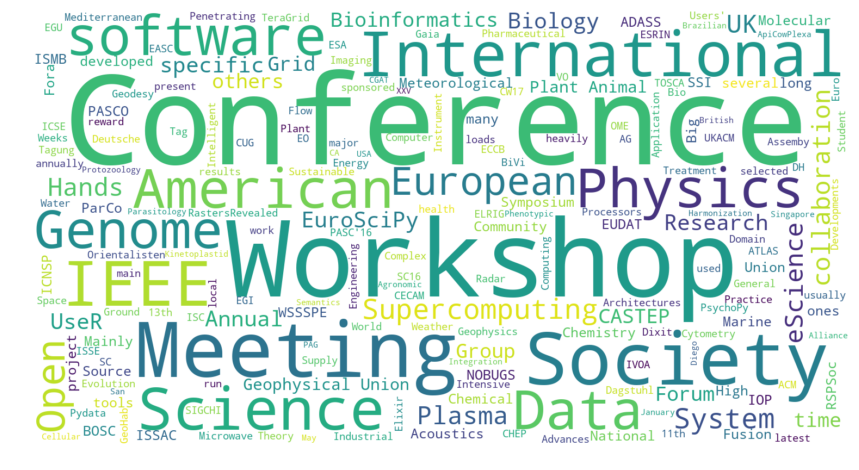

In [147]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

## Open source

### Have you ever released your software under an open-source licence?

In [148]:
v_to_count, filename  = get_count(df, ['open01can. Have you ever released your software under an open-source licence?'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [149]:
perc_to_count = get_percentage(v_to_count, filename)

In [150]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever released your software under an o...                            
 Have you ever released your software under an ...          158          76   

                                                    NaN value  \
Have you ever released your software under an o...              
 Have you ever released your software under an ...         19   

                                                   Yes [Percentage]  \
Have you ever released your software under an o...                    
 Have you ever released your software under an ...               68   

                                                   No [Percentage]  
Have you ever released your software under an o...                  
 Have you ever released your software under an ...              32

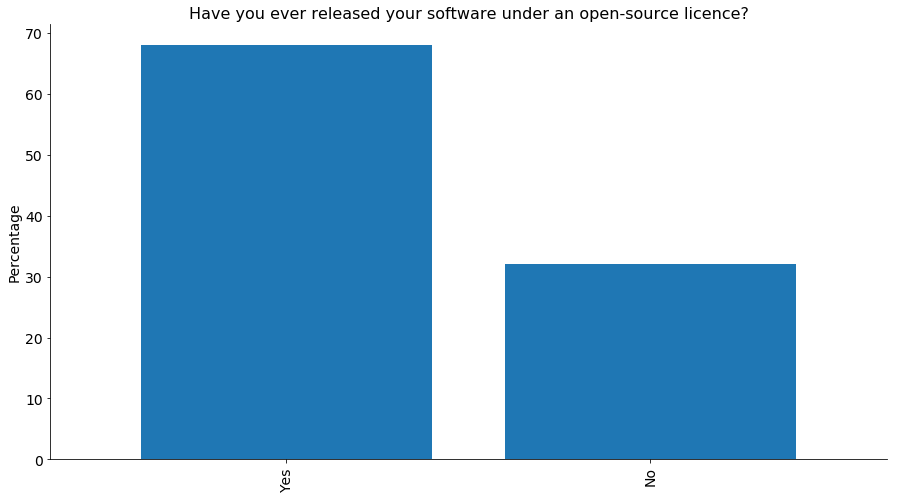

In [151]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you release the software projects you've worked on under an open-source licence?

In [152]:
v_to_count, filename  = get_count(df, ["open1can[A5]. How often do you release the software projects you've worked on under an open-source licence? []"], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_time_5.csv", "False", "./uk/output/")

In [153]:
display(v_to_count) 

open1can[A5]. How often do you release the software projects you've worked on under an open-source licence? []
How often do you release the software projects ...                                                                                                                
Never                                                                                             NaN                                                             
Sometimes                                                                                        40.0                                                             
Often                                                                                            23.0                                                             
Very Often                                                                                       43.0                                                             
Always                                                                                           48.0

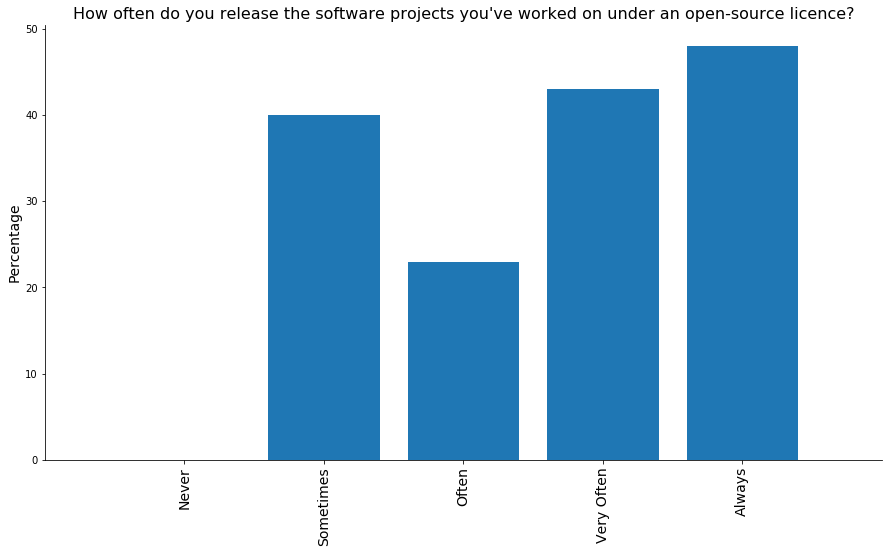

In [154]:
_ = get_plot(v_to_count, "likert")

### Have you ever used a Digital Object Identifier (DOI) to identify your software?

In [155]:
v_to_count, filename  = get_count(df, ['open03can. Have you ever used a Digital Object Identifier (DOI) to identify your software?'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [156]:
perc_to_count = get_percentage(v_to_count, filename)

In [157]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever used a Digital Object Identifier ...                            
 Have you ever used a Digital Object Identifier...           52         182   

                                                    NaN value  \
Have you ever used a Digital Object Identifier ...              
 Have you ever used a Digital Object Identifier...         19   

                                                   Yes [Percentage]  \
Have you ever used a Digital Object Identifier ...                    
 Have you ever used a Digital Object Identifier...               22   

                                                   No [Percentage]  
Have you ever used a Digital Object Identifier ...                  
 Have you ever used a Digital Object Identifier...              78

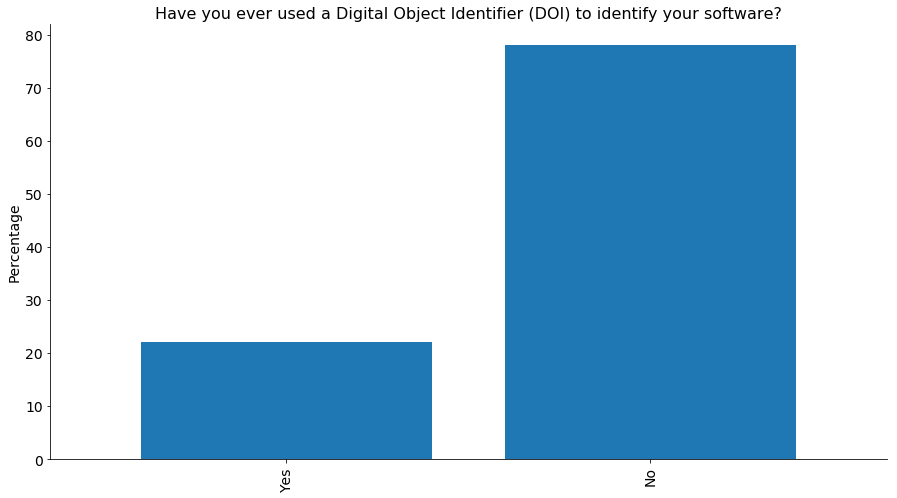

In [158]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you associate your software with a Digital Object Identifier (DOI)?

In [159]:
v_to_count, filename  = get_count(df, ['open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []'], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_time_5.csv", "False", "./uk/output/")

In [160]:
display(v_to_count) 

open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []
How often do you associate your software with a...                                                                                                      
Never                                                                                             NaN                                                   
Sometimes                                                                                        30.0                                                   
Often                                                                                             8.0                                                   
Very Often                                                                                        5.0                                                   
Always                                                                                            9.0

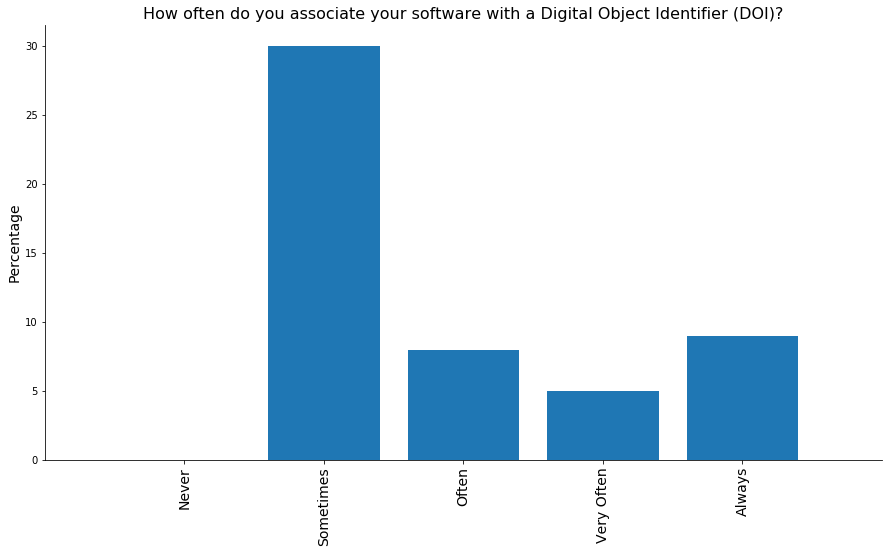

In [161]:
_ = get_plot(v_to_count, "likert")

# Section 8. Sustainability and technical details

This section comprises two subsections that focus on the technical and development aspects of the RSEs' work. They aim to understand good practices in developing software and which tools are important for RSEs.

Developing software requires a set of good practices to ensure the quality of the subsequent analysis as well as the robustness of the developed software, to name a few of important aspects. We wanted to see if the implementation of some simple but essential good practices were a reality. Three measures were created, the implementation of testing, the bus factor and the technical hand over plan.
These metrics allows to see the importance of the RSEs role in their team but also if they are themselves implementing some practices that are used widely in industry but less in academic research.

We asked the participants to choose any of the following testing methods:
* Test engineers conduct testing
* Developers conduct testing
* Users conduct testing
* No formal testing

Obviously, the *test engineers conduct testing* is the most robust testing method but may not be possible in smaller projects while no formal testing should not occur in any ideal scenario, regardless of the size of the project. Surprisingly, 10% of the participants confessed they were not implementing any testing at all. It may seems a low number but we think it is still a high percentage considering the specific work of this population. When they are conducting testing, the RSEs seems to prefer (or only able to implement) *developer testing* (57% of them) or letting the users conduct the testing (28%), while the use of test engineers is marginal (5%).

We chose two broad measures to provide an insight into sustainability: the bus factor and technical hand over planning. The bus factor is a measure of the number of developers who understand a specific software project and could, with only a cursory review of the project, maintain or extend the code. A project with a bus factor of 1 is completely reliant on only one developer. If this developer finds new employment, becomes ill or is hit by the titular bus, then the project will fail. A high bus factor provides some confidence that the project can be sustained even if a developer leaves. A technical hand over plan is used to introduce a new developer to a software project. These plans cover basic information, such as the licence and location of the software, a repository, a description of the software architecture, a summary of development plans and any other information that a new developer would need to understand the software. A project that has written (and maintained) a technical hand over plan can withstand the departure of a developer, even a key developer, significantly better than one without such a plan.

Almost the half of the RSEs' projects have a bus factor of 1 (42%), followed by a bus factor of 2 (31%). Higher bus factor is only marginal with only 12% of the projects having a bus factor of 3, 3% of a bus factor of 4 and 11% a bus factor equal or higher than 5.
On top of that, the presence of a technical plan, which can mitigate the low bus factor in the different projects, is really low (26%) and presents a risk of project failures.


On technical details we wanted to know which of the programming languages are mostly used by the RSEs. We give them a multi-choice list inspired by the [results](https://insights.stackoverflow.com/survey/2017#most-popular-technologies) published by Stackoverflow. Python and Unix Shell Scripting are clearly the most used language with 15% and 11%. The rests of the languages that are higher than 5% are Markup languages (9%), C++ (8%), C (7%) and Javascript (7%), FORTRAN and SQL (6%).
About which Operating System used by RSEs, a majority are using GNU/Linux (61%), while Windows and OS X have way less users (23% and 15%).


## Good practices

### In general, what sort of testing do you conduct on your software? (check all that apply)

In [162]:
v_to_count, filename  = get_count(df, ['proj4can[SQ001]. In general, what sort of testing do you conduct on your software? (check all that apply) [No formal testing]', 'proj4can[SQ002]. In general, what sort of testing do you conduct on your software? (check all that apply) [Developers conduct testing]', 'proj4can[SQ003]. In general, what sort of testing do you conduct on your software? (check all that apply) [Test engineers conduct testing]', 'proj4can[SQ004]. In general, what sort of testing do you conduct on your software? (check all that apply) [Users conduct testing]'], "multiple choices", "./../../survey_creation/2017/uk/listAnswers/testing.csv", "False", "./uk/output/")

In [163]:
perc_to_count = get_percentage(v_to_count, filename)

In [164]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
In general, what sort of testing do you conduct...                  
Developers conduct testing                            202         57
Users conduct testing                                  99         28
No formal testing                                      37         10
Test engineers conduct testing                         18          5

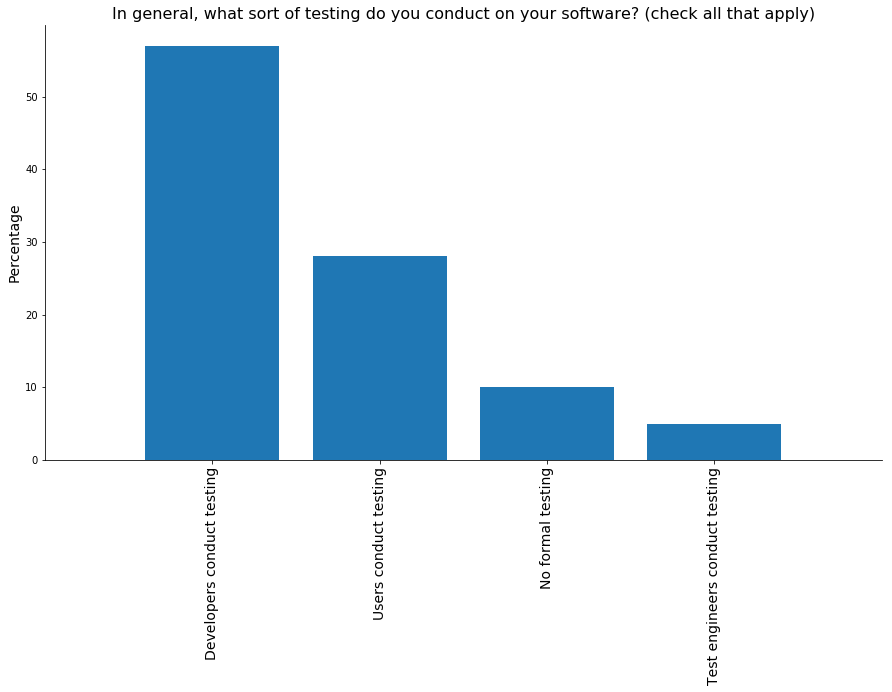

In [165]:
_ = get_plot(perc_to_count, "multiple choices")

### What is the bus factor of your most important software project?

In [166]:
v_to_count, filename  = get_count(df, ['stability1. What is the bus factor of your most important software project?'], "likert", "./../../survey_creation/2017/uk/listAnswers/bus_factor.csv", "False", "./uk/output/")

In [167]:
perc_to_count = get_percentage(v_to_count, filename)

In [168]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What is the bus factor of your most important s...                  
1                                                      99         42
2                                                      72         31
3                                                      29         12
4                                                       8          3
5+                                                     25         11

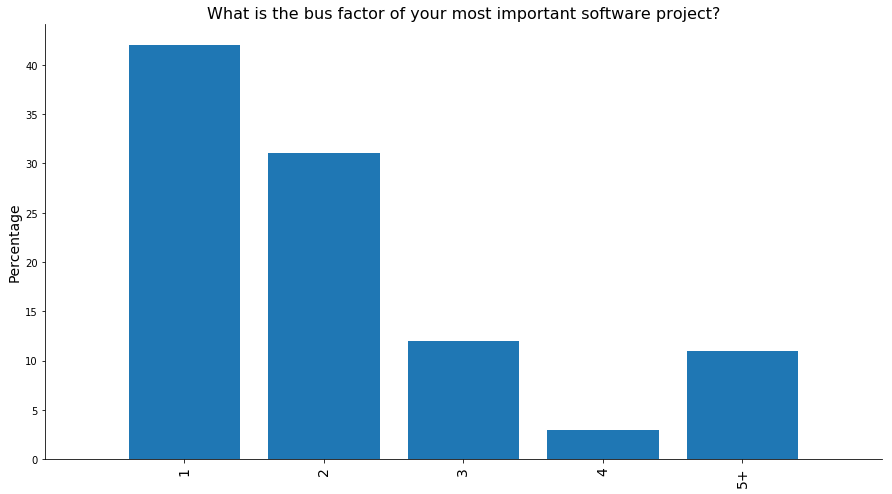

In [169]:
_ = get_plot(perc_to_count, "likert")

### Is there a technical hand-over plan for your most important software project?

In [170]:
v_to_count, filename  = get_count(df, ['stability2. Is there a technical handover plan for your most important software project?'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [171]:
perc_to_count = get_percentage(v_to_count, filename)

In [172]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Is there a technical handover plan for your mos...                            
 Is there a technical handover plan for your mo...           61         173   

                                                    NaN value  \
Is there a technical handover plan for your mos...              
 Is there a technical handover plan for your mo...         19   

                                                   Yes [Percentage]  \
Is there a technical handover plan for your mos...                    
 Is there a technical handover plan for your mo...               26   

                                                   No [Percentage]  
Is there a technical handover plan for your mos...                  
 Is there a technical handover plan for your mo...              74

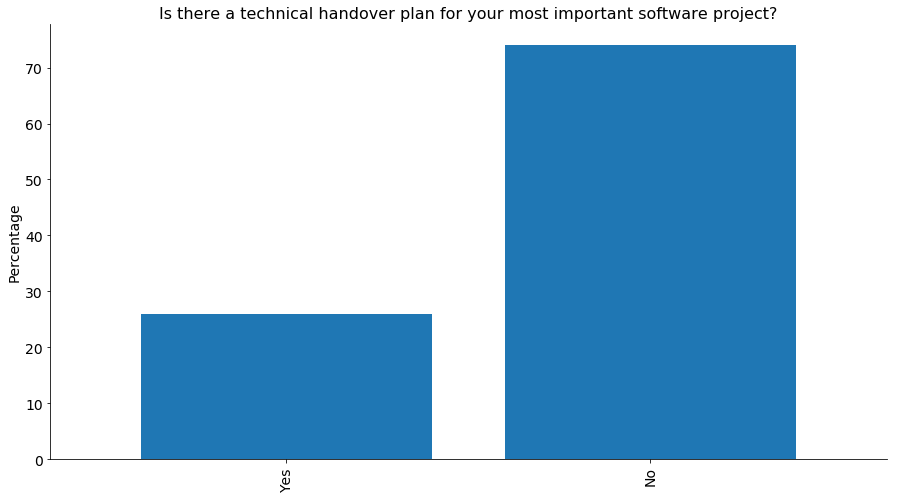

In [173]:
_ = get_plot(perc_to_count, "y/n/na")

## Technical details

### What Operating System do you prefer to use at work?

In [174]:
v_to_count, filename  = get_count(df, ['tool2. What Operating System do you prefer to use at work?'], "one choice", "./../../survey_creation/2017/uk/listAnswers/os.csv", "False", "./uk/output/")

In [175]:
perc_to_count = get_percentage(v_to_count, filename)

In [176]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What Operating System do you prefer to use at w...                  
GNU/Linux                                             135         61
OS X                                                   51         23
Windows                                                33         15
Other                                                   2          1
NaN                                                    32        NaN

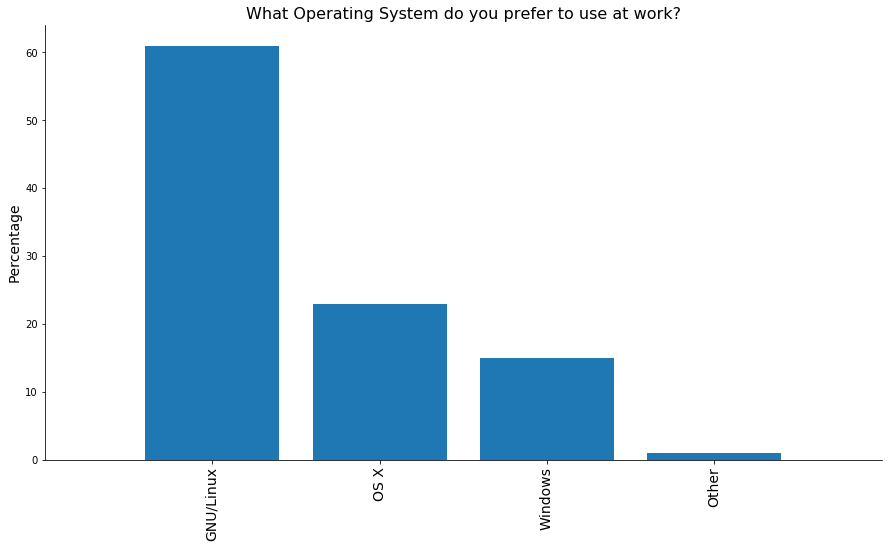

In [177]:
_ = get_plot(perc_to_count, "one choice")

### What programming languages do you use at work? (Select as many as apply)

In [178]:
v_to_count, filename  = get_count(df, ['tool4can[SQ001]. What programming languages do you use at work? (Select as many as apply) [Assembly]', 'tool4can[SQ002]. What programming languages do you use at work? (Select as many as apply) [C]', 'tool4can[SQ003]. What programming languages do you use at work? (Select as many as apply) [C#]', 'tool4can[SQ004]. What programming languages do you use at work? (Select as many as apply) [C++]', 'tool4can[SQ005]. What programming languages do you use at work? (Select as many as apply) [Clojure]', 'tool4can[SQ006]. What programming languages do you use at work? (Select as many as apply) [CoffeeScript]', 'tool4can[SQ007]. What programming languages do you use at work? (Select as many as apply) [Common Lisp]', 'tool4can[SQ036]. What programming languages do you use at work? (Select as many as apply) [CUDA]', 'tool4can[SQ008]. What programming languages do you use at work? (Select as many as apply) [Dart]', 'tool4can[SQ009]. What programming languages do you use at work? (Select as many as apply) [Elixir]', 'tool4can[SQ010]. What programming languages do you use at work? (Select as many as apply) [Erlang]', 'tool4can[SQ011]. What programming languages do you use at work? (Select as many as apply) [F#]', 'tool4can[SQ037]. What programming languages do you use at work? (Select as many as apply) [FORTRAN]', 'tool4can[SQ012]. What programming languages do you use at work? (Select as many as apply) [Go]', 'tool4can[SQ013]. What programming languages do you use at work? (Select as many as apply) [Groovy]', 'tool4can[SQ014]. What programming languages do you use at work? (Select as many as apply) [Hack]', 'tool4can[SQ015]. What programming languages do you use at work? (Select as many as apply) [Haskell]', 'tool4can[SQ016]. What programming languages do you use at work? (Select as many as apply) [Java]', 'tool4can[SQ017]. What programming languages do you use at work? (Select as many as apply) [JavaScript]', 'tool4can[SQ018]. What programming languages do you use at work? (Select as many as apply) [Julia]', 'tool4can[SQ019]. What programming languages do you use at work? (Select as many as apply) [Lua]', 'tool4can[SQ038]. What programming languages do you use at work? (Select as many as apply) [Markup languages (HTML, markdown,...)]', 'tool4can[SQ020]. What programming languages do you use at work? (Select as many as apply) [Matlab]', 'tool4can[SQ021]. What programming languages do you use at work? (Select as many as apply) [Objective-C]', 'tool4can[SQ022]. What programming languages do you use at work? (Select as many as apply) [Perl]', 'tool4can[SQ023]. What programming languages do you use at work? (Select as many as apply) [PHP]', 'tool4can[SQ024]. What programming languages do you use at work? (Select as many as apply) [Python]', 'tool4can[SQ025]. What programming languages do you use at work? (Select as many as apply) [R]', 'tool4can[SQ026]. What programming languages do you use at work? (Select as many as apply) [Ruby]', 'tool4can[SQ027]. What programming languages do you use at work? (Select as many as apply) [Rust]', 'tool4can[SQ028]. What programming languages do you use at work? (Select as many as apply) [Scala]', 'tool4can[SQ029]. What programming languages do you use at work? (Select as many as apply) [Smalltalk]', 'tool4can[SQ030]. What programming languages do you use at work? (Select as many as apply) [SQL]', 'tool4can[SQ031]. What programming languages do you use at work? (Select as many as apply) [Swift]', 'tool4can[SQ039]. What programming languages do you use at work? (Select as many as apply) [Unix Shell Scripting]', 'tool4can[SQ032]. What programming languages do you use at work? (Select as many as apply) [TypeScript]', 'tool4can[SQ033]. What programming languages do you use at work? (Select as many as apply) [VB.NET]', 'tool4can[SQ034]. What programming languages do you use at work? (Select as many as apply) [VBA]', 'tool4can[SQ035]. What programming languages do you use at work? (Select as many as apply) [Visual Basic]'], "multiple choices", "./../../survey_creation/2017/uk/listAnswers/programing_language.csv", "False", "./uk/output/")

In [179]:
perc_to_count = get_percentage(v_to_count, filename)

In [180]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
What programming languages do you use at work? ...                  
Python                                                189         15
Unix Shell Scripting                                  140         11
Markup languages (HTML, markdown,...)                 113          9
C++                                                    94          8
C                                                      92          7
JavaScript                                             85          7
FORTRAN                                                81          6
SQL                                                    79          6
Java                                                   65          5
Matlab                                                 61          5
R                                                      57          5
Perl                                                   41          3
PHP                                                    31          2
CUDA                                                   21          2
C#                                                     19          2
Ruby                                                   14          1
TypeScript                                              9          1
Groovy                                                  7          1
VBA                                                     7          1
Visual Basic                                            7          1
Scala                                                   6          0
Assembly                                                5          0
Go                                                      5          0
Rust                                                    3          0
F#                                                      3          0
Elixir                                                  2          0
CoffeeScript                                            2          0
Objective-C                                             2          0
Julia                                                   2          0
Haskell                                                 2          0
Erlang                                                  1          0
Smalltalk                                               1          0
Swift                                                   1          0
VB.NET                                                  1          0
Clojure                                                 1          0
Lua                                                     1          0
Hack                                                    0          0
Dart                                                    0          0
Common Lisp                                             0          0

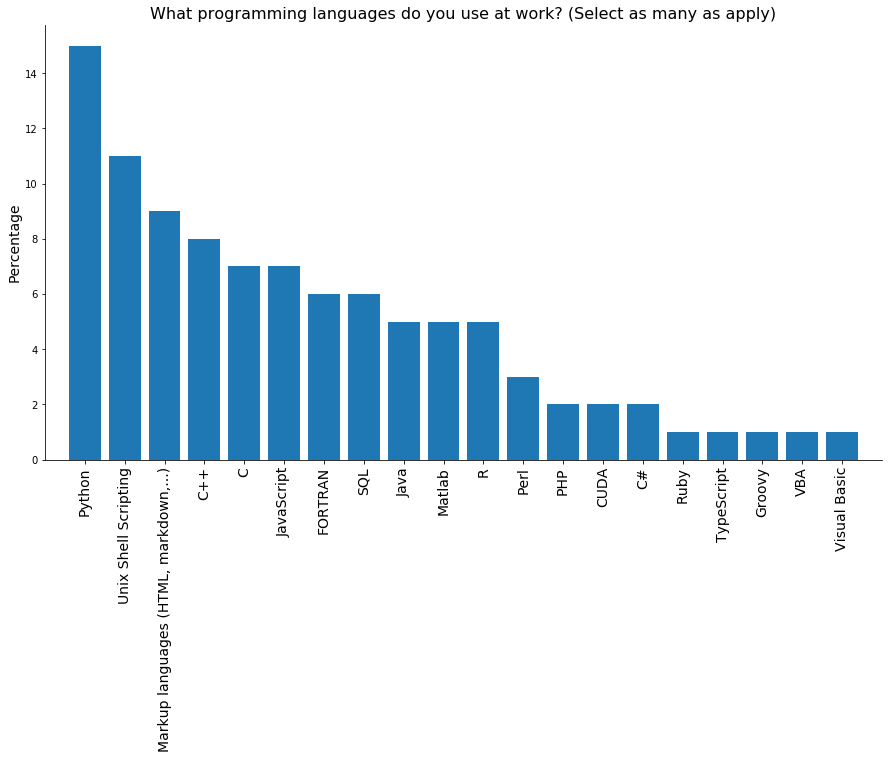

In [181]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 9. Job satisfaction

The job satisfaction is an essential pulse to take about a community's health. It helps to track the evolution and the current state of the RSEs within their role and to catch any sign of structural or organisational dysfunction that are translated into well-being. There are a lot of different metrics to measure the quality of a job on a personal and psychological level [1]. Several models exist to understand the link between different factors of job satisfaction and turnover intention [2]–[6]. Turnover intention is an important measure that is highly associated with the risk of employees leaving the organisation [3]. Job satisfaction is important in retaining RSEs. Perceived employability provides information on how workers values their own skills in regard of the market. To measure the different attitudes toward the RSE role, we used scales that have been created in [5], [6], [7], [8]. These are Likert scale [7], which are 5 point ordinal scales graduated from Strongly disagree to Strongly agree. Each scale is composed of several so called items (i.e. questions) that each measure one attitude.

Beside these specific concepts we asked more general question about their satisfaction in their current position and their satisfaction with their career in general with a range of answers from *0 - Not at all satisfied* to *10 - Completely satisfied*, 76% of the participants answered more than 5 to the scale (which can be considered as a neutral position) to the question about their satisfaction about their current position. For the question about their satisfaction with their career in general (and using the same scale), 67% of the participants answered more than 5 to the scale.

The specific questions about their job satisfaction reflect, in general, the same opinion as the two more generic questions. However, the granularity helps to identify a couple of issues that would not appears with generic questions:

* *The feedback about the performance*: These questions ask if the RSEs feel that they receive enough information about their work and their performance. While they seems to have enough information about the purpose of their work and having access to sufficient data and information, they are less assertive about the feedback they receive from their colleagues and their supervisors.

* *The turnover intention*: These questions aim to measure the desire to quit their current position. Overall, the participants are not willing to leave their position and are not necessarily searching for other job, even if the potential job would offer the same compensations.

* *The perceived employability*: This concept is linked to the previous one. People may not have the intention to leave their jobs, not because they like it, but because they fear they are not employable. This is not the case here, the participants consider themselves more often employable than not.

* *The affective recognition*: This concept try to see if the participants receive positive feedback from their supervisors. Overall, again the participants report a positive relation with their supervisors. It means they are not systematic issues with direct management.

* *Affective satisfaction*: Here, the concept measures how much the participants enjoy and like their job. The answers were positive and again, reflect the answers given at the more generic questions.

* *The possibility of progression*: This question aims to study the possibility of evolution for the RSEs, if information is available and if they see a possibility of evolution within their current career. This is the only questions that clearly received negative answers. To summarise, even if the RSEs have planned to be in this position, as a part of their career plan, the majority of them think they cannot be promoted in their current group, neither the information for such progression is easily accessible. Moreover, they do not think that in their career plan there is a lot of opportunities. They are also quite doubtful about the fact that their next position will be a RSE role. 

### References

* [1] B. Aziri, “Job satisfaction: A literature review,” vol. 3, no. 4, pp. 77–86.
* [2] N. De Cuyper, S. Mauno, U. Kinnunen, and A. Mkikangas, “The role of job resources in the relation between perceived employability and turnover intention: A prospective two-sample study,” vol. 78, no. 2, pp. 253–263.
* [3] A. B. Bakker and E. Demerouti, “The job demands-resources model: State of the art,” vol. 22, no. 3, pp. 309–328.
* [4] G. H. L. Cheng and D. K. S. Chan, “Who Suffers More from Job Insecurity? A Meta-Analytic Review.” vol. 57, no. 2, p. 272.
* [5] E. R. Thompson and F. T. Phua, “A brief index of affective job satisfaction,” vol. 37, no. 3, pp. 275–307.
* [6] L. Greenhalgh and Z. Rosenblatt, “Job insecurity: Toward conceptual clarity,” pp. 438–448.
* [7] R. Likert, “A technique for the measurement of attitudes.” vol. 22, no. 140, p. 55.

## General satisfaction

### In general, how satisfied are you with Your current position

In [182]:
v_to_count, filename  = get_count(df, ['satisGen1[SQ001]. In general, how satisfied are you with: [Your current position]', 'satisGen1[SQ002]. In general, how satisfied are you with: [Your career]'], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_satisfied_10.csv", "False", "./uk/output/")

In [183]:
display(v_to_count) 

Your current position  Your career
In general, how satisfied are you with:                                    
0 - Not at all satisfied                                     7            4
1                                                            4            4
2                                                            6            7
3                                                            4           14
4                                                           12           19
5                                                           18           23
6                                                           32           37
7                                                           61           55
8                                                           44           41
9                                                           26           12
10 - Completely satisfied                                    5            4

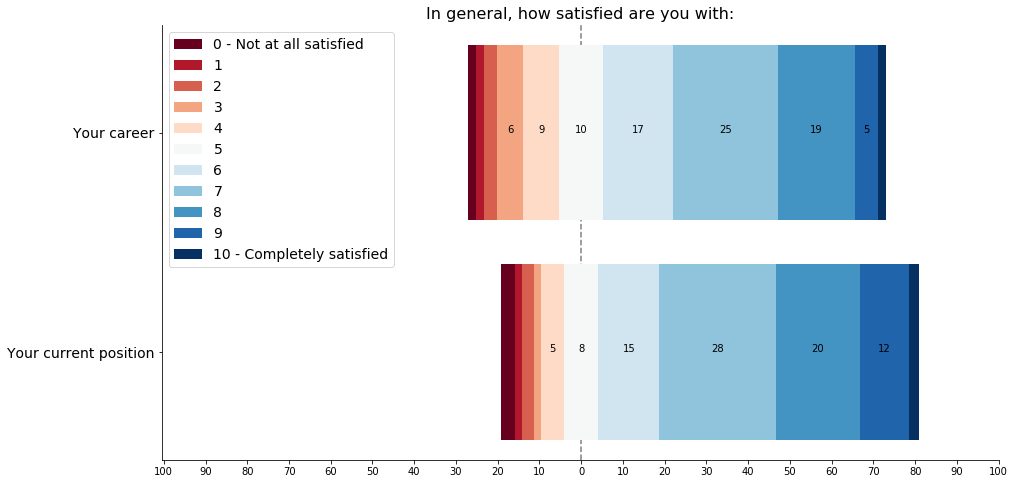

In [184]:
_ = get_plot(v_to_count, "likert")

## Feedback about performance

### Do you receive sufficient information on the results of your work?; Does your work give you the opportunity to check on how well you are doing your work?; In your work, do you have access to sufficient data and information?; Do you receive sufficient information on the purpose of your work?; Does your work provide you with direct feedback on how well you are doing your work?; Does your supervisor/line manager inform you about how well you are doing your work?; Do your colleagues inform you about how well you are doing your work?

In [185]:
v_to_count, filename  = get_count(df, ['likerttime1[perfCheck1]. Please rate the following propositions. There are no right or wrong answers [Do you receive sufficient information on the results of your work?]', 'likerttime1[perfCheck2]. Please rate the following propositions. There are no right or wrong answers [Do you get the opportunity to check on how well you are doing your work?]', 'likerttime1[perfCheck3]. Please rate the following propositions. There are no right or wrong answers [Do you have access to sufficient data and information to do your work?]', 'likertime2[perfCheck4]. Please rate the following propositions. There are no right or wrong answers [Do you receive sufficient information on the purpose of your work?]', 'likertime2[perfCheck5]. Please rate the following propositions. There are no right or wrong answers [Does your work provide you with direct feedback on how well you are doing?]', 'likertime2[perfCheck6]. Please rate the following propositions. There are no right or wrong answers [Does your supervisor/line manager inform you about how well you are doing your work?]', 'likerttime1[perfCheck7]. Please rate the following propositions. There are no right or wrong answers [Do your colleagues inform you about how well you are doing your work?]'], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_time_5.csv", "False", "./uk/output/")

In [186]:
display(v_to_count) 

Do you receive sufficient information on the results of your work?  \
Please rate the following propositions                                                                       
Never                                                                                   5                    
Sometimes                                                                              74                    
Often                                                                                  62                    
Very Often                                                                             51                    
Always                                                                                 21                    

                                        Do you get the opportunity to check on how well you are doing your work?  \
Please rate the following propositions                                                                             
Never                                                                                  17                          
Sometimes                                                                              90                          
Often                                                                                  68                          
Very Often                                                                             30                          
Always                                                                                  8                          

                                        Do you have access to sufficient data and information to do your work?  \
Please rate the following propositions                                                                           
Never                                                                                   1                        
Sometimes                                                                              44                        
Often                                                                                  62                        
Very Often                                                                             75                        
Always                                                                                 40                        

                                        Do you receive sufficient information on the purpose of your work?  \
Please rate the following propositions                                                                       
Never                                                                                   6                    
Sometimes                                                                              38                    
Often                                                                                  73                    
Very Often                                                                             50                    
Always                                                                                 47                    

                                        Does your work provide you with direct feedback on how well you are doing?  \
Please rate the following propositions                                                                               
Never                                                                                  15                            
Sometimes                                                                             115                            
Often                                                                                  41                            
Very Often                                                                             29                            
Always                                                                                 13                            

                                        Does your superviso

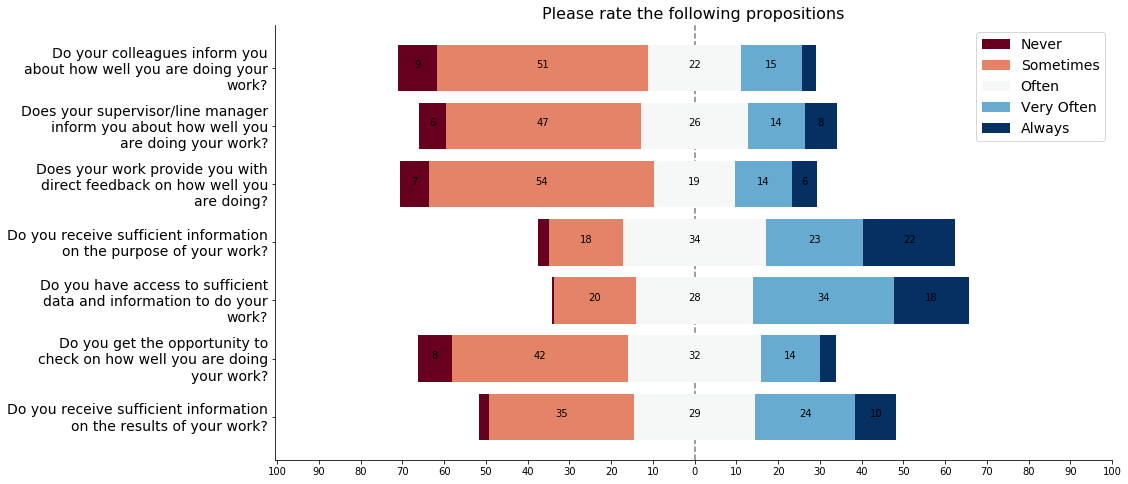

In [187]:
_ = get_plot(v_to_count, "likert")

## Turnover intention

### How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?; How often do you look forward to another day at work?; How often do you consider leaving your job?; How often do dream about getting another job that will better suit your needs?

In [188]:
v_to_count, filename  = get_count(df, ['likertime2[turnOver1]. Please rate the following propositions. There are no right or wrong answers [How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?]', 'likertime2[turnOver2]. Please rate the following propositions. There are no right or wrong answers [How often do you look forward to another day at work?]', 'likerttime1[turnOver3]. Please rate the following propositions. There are no right or wrong answers [How often do you consider leaving your job?]', 'likerttime1[turnOver4]. Please rate the following propositions. There are no right or wrong answers [How often do you dream about getting another job that will better suit your needs?]'], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_time_5.csv", "False", "./uk/output/")

In [189]:
display(v_to_count) 

How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?  \
Please rate the following propositions                                                                                                                 
Never                                                                                  32                                                              
Sometimes                                                                              98                                                              
Often                                                                                  41                                                              
Very Often                                                                             24                                                              
Always                                                                                 12                                                              

                                        How often do you look forward to another day at work?  \
Please rate the following propositions                                                          
Never                                                                                26.0       
Sometimes                                                                           115.0       
Often                                                                                74.0       
Very Often                                                                            NaN       
Always                                                                                NaN       

                                        How often do you consider leaving your job?  \
Please rate the following propositions                                                
Never                                                                          54.0   
Sometimes                                                                     135.0   
Often                                                                          30.0   
Very Often                                                                      NaN   
Always                                                                          NaN   

                                        How often do you dream about getting another job that will better suit your needs?  
Please rate the following propositions                                                                                      
Never                                                                                  43                                   
Sometimes                                                                              99                                   
Often                                                                                  23                                   
Very Often                                                                             34                                   
Always                                                                                 19

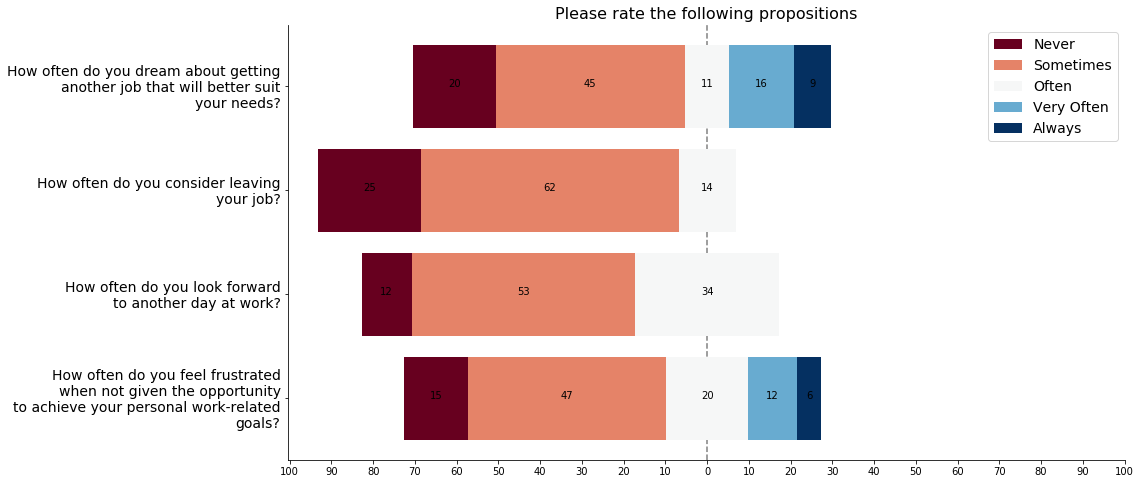

In [190]:
_ = get_plot(v_to_count, "likert")

### My current job satisfies my personal needs; I would accept another job at the same compensation level if I was offered it

In [191]:
v_to_count, filename  = get_count(df, ['likertagree1[turnOver5]. Please rate the following propositions. There are no right or wrong answers [My current job satisfies my personal needs]', 'likertagree3[turnOver6]. Please rate the following propositions. There are no right or wrong answers [I would accept another job at the same compensation level if I was offered it]'], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_agree.csv", "False", "./uk/output/")

In [192]:
display(v_to_count) 

My current job satisfies my personal needs  \
Please rate the following propositions                                               
Strongly disagree                                                                9   
Disagree                                                                        26   
Neither agree or disagree                                                       36   
Agree                                                                          113   
Strongly Agree                                                                  37   

                                        I would accept another job at the same compensation level if I was offered it  
Please rate the following propositions                                                                                 
Strongly disagree                                                                      27                              
Disagree                                                                               64                              
Neither agree or disagree                                                              72                              
Agree                                                                                  33                              
Strongly Agree                                                                         13

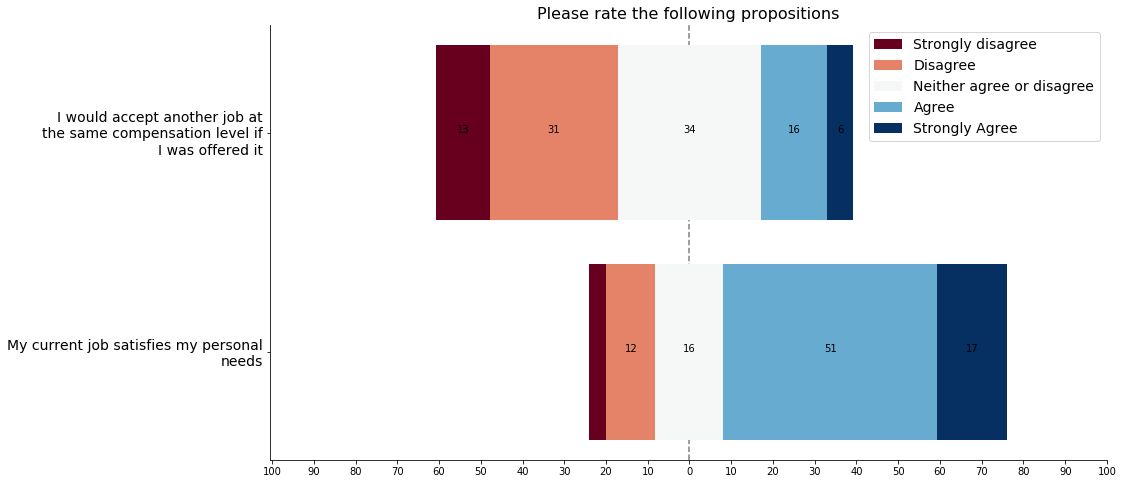

In [193]:
_ = get_plot(v_to_count, "likert")

## Perceived Employability

### It would not be very difficult for me to get an equivalent job in a different organisation; I can think of a number of organisations that would probably offer me a job; My experience is in demand on the labour market; Given my qualifications and experience, getting a new job would not be very hard at all

In [194]:
v_to_count, filename  = get_count(df, ['likertagree1[percEmp1]. Please rate the following propositions. There are no right or wrong answers [It would not be very difficult for me to get an equivalent job in a different organisation]', 'likertagree2[percEmp2]. Please rate the following propositions. There are no right or wrong answers [I can think of a number of organisations that would probably offer me a job]', 'likertagree1[percEmp3]. Please rate the following propositions. There are no right or wrong answers [My experience is in demand on the labour market]', 'likertagree3[percEmp4]. Please rate the following propositions. There are no right or wrong answers [Given my qualifications and experience, getting a new job would not be very hard at all]'], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_agree.csv", "False", "./uk/output/")

In [195]:
display(v_to_count) 

It would not be very difficult for me to get an equivalent job in a different organisation  \
Please rate the following propositions                                                                                               
Strongly disagree                                                                      11                                            
Disagree                                                                               39                                            
Neither agree or disagree                                                              64                                            
Agree                                                                                  61                                            
Strongly Agree                                                                         36                                            

                                        I can think of a number of organisations that would probably offer me a job  \
Please rate the following propositions                                                                                
Strongly disagree                                                                       2                             
Disagree                                                                               14                             
Neither agree or disagree                                                              35                             
Agree                                                                                 101                             
Strongly Agree                                                                         69                             

                                        My experience is in demand on the labour market  \
Please rate the following propositions                                                    
Strongly disagree                                                                     3   
Disagree                                                                             13   
Neither agree or disagree                                                            37   
Agree                                                                               101   
Strongly Agree                                                                       60   

                                        Given my qualifications and experience, getting a new job would not be very hard at all  
Please rate the following propositions                                                                                           
Strongly disagree                                                                       8                                        
Disagree                                                                               20                                        
Neither agree or disagree                                                              66                                        
Agree                                                                                  75                                        
Strongly Agree                                                                         44

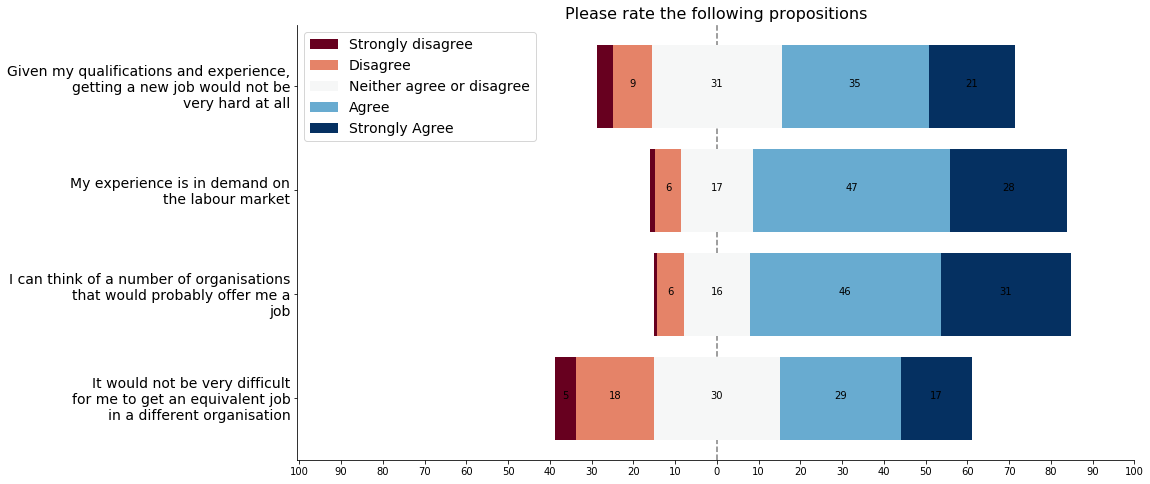

In [196]:
_ = get_plot(v_to_count, "likert")

## Affective recognition

### I am satisfied with my supervisor/line manager's confidence in me; I am satisfied with a word of thanks from my supervisor/line manager; I am satisfied with the recognition I receive from my supervisor/line manager for doing my job; I am satisfied with the compliments from my supervisor/line manager concerning my work; I am satisfied with the encouragement from my supervisor/line manager while doing my job

In [197]:
v_to_count, filename  = get_count(df, ["likertagree3[affRec1]. Please rate the following propositions. There are no right or wrong answers [I am satisfied with my supervisor/line manager's confidence in me]", 'likertagree2[affRec2]. Please rate the following propositions. There are no right or wrong answers [I am satisfied with a word of thanks from my supervisor/line manager]', 'likertagree2[affRec3]. Please rate the following propositions. There are no right or wrong answers [I am satisfied with the recognition I receive from my supervisor/line manager for doing my job]', 'likertagree1[affRec4]. Please rate the following propositions. There are no right or wrong answers [I am satisfied with the compliments from my supervisor/line manager concerning my work]', 'likertagree3[affRec5]. Please rate the following propositions. There are no right or wrong answers [I am satisfied with the encouragement from my supervisor/line manager while doing my job]'], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_agree.csv", "False", "./uk/output/")

In [198]:
display(v_to_count) 

I am satisfied with my supervisor/line manager's confidence in me  \
Please rate the following propositions                                                                      
Strongly disagree                                                                       6                   
Disagree                                                                               13                   
Neither agree or disagree                                                              30                   
Agree                                                                                 105                   
Strongly Agree                                                                         56                   

                                        I am satisfied with a word of thanks from my supervisor/line manager  \
Please rate the following propositions                                                                         
Strongly disagree                                                                       8                      
Disagree                                                                               22                      
Neither agree or disagree                                                              58                      
Agree                                                                                  89                      
Strongly Agree                                                                         37                      

                                        I am satisfied with the recognition I receive from my supervisor/line manager for doing my job  \
Please rate the following propositions                                                                                                   
Strongly disagree                                                                       9                                                
Disagree                                                                               31                                                
Neither agree or disagree                                                              37                                                
Agree                                                                                  90                                                
Strongly Agree                                                                         51                                                

                                        I am satisfied with the compliments from my supervisor/line manager concerning my work  \
Please rate the following propositions                                                                                           
Strongly disagree                                                                       8                                        
Disagree                                                                               37                                        
Neither agree or disagree                                                              43                                        
Agree                                                                                 101                                        
Strongly Agree                                                                         19                                        

                                        I am satisfied with the encouragement from my supervisor/line manager while doing my job  
Please rate the following propositions                                                                                            
Strongly disagree                                                                       9                                         
Disagree                                                                               33                                         
Neither agree or disagree                                                              46

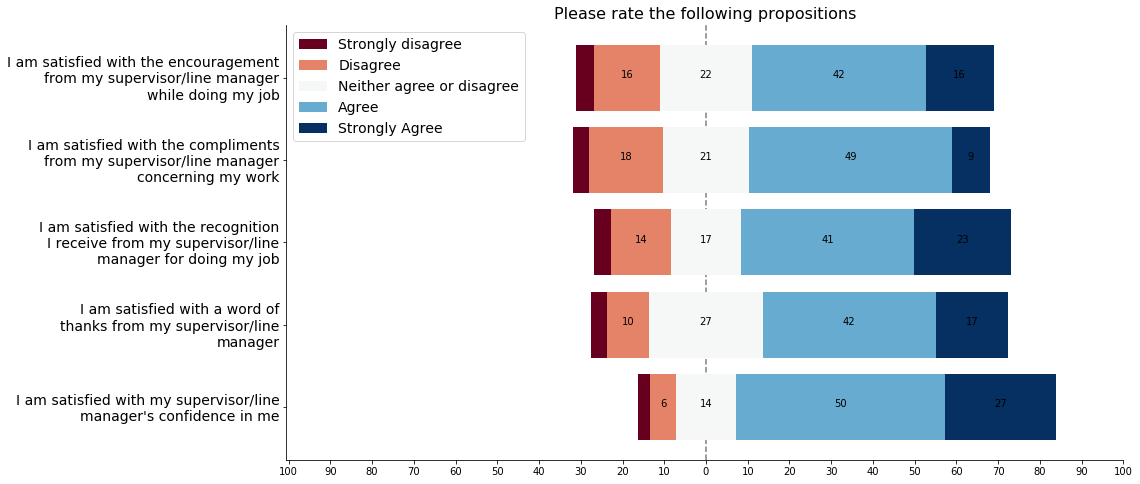

In [199]:
_ = get_plot(v_to_count, "likert")

## Affective satisfaction

### I find real enjoyment in my job; Most days I am enthusiastic about my job; I feel fairly well satisfied with my job; I like my job better than the average person

In [200]:
v_to_count, filename  = get_count(df, ['likertagree2[affSat1]. Please rate the following propositions. There are no right or wrong answers [I find real enjoyment in my job]', 'likertagree2[affSat2]. Please rate the following propositions. There are no right or wrong answers [Most days I am enthusiastic about my job]', 'likertagree1[affSat3]. Please rate the following propositions. There are no right or wrong answers [I feel satisfied with my job]', 'likertagree3[affSat4]. Please rate the following propositions. There are no right or wrong answers [I like my job more than average]'], "likert", "./../../survey_creation/2017/uk/listAnswers/likert_agree.csv", "False", "./uk/output/")

In [201]:
display(v_to_count) 

I find real enjoyment in my job  \
Please rate the following propositions                                    
Strongly disagree                                                     4   
Disagree                                                             10   
Neither agree or disagree                                            20   
Agree                                                                95   
Strongly Agree                                                       96   

                                        Most days I am enthusiastic about my job  \
Please rate the following propositions                                             
Strongly disagree                                                              5   
Disagree                                                                      16   
Neither agree or disagree                                                     37   
Agree                                                                        115   
Strongly Agree                                                                50   

                                        I feel satisfied with my job  \
Please rate the following propositions                                 
Strongly disagree                                                  9   
Disagree                                                          26   
Neither agree or disagree                                         40   
Agree                                                            111   
Strongly Agree                                                    29   

                                        I like my job more than average  
Please rate the following propositions                                   
Strongly disagree                                                     7  
Disagree                                                             10  
Neither agree or disagree                                            41  
Agree                                                               101  
Strongly Agree                                                       55

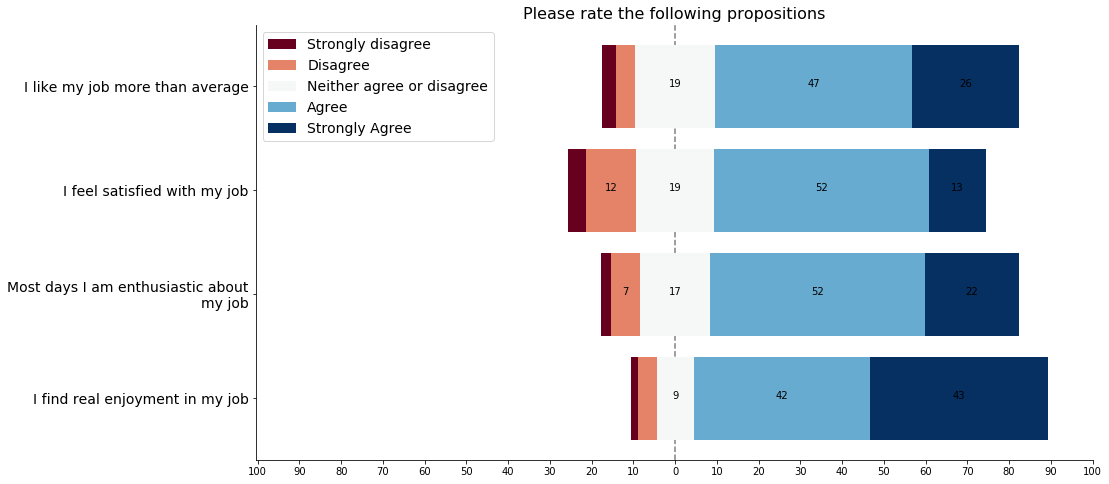

In [202]:
_ = get_plot(v_to_count, "likert")

# Section 10. Research Software Engineer

This last section regroups different questions about RSEs in general, the specific skills for them, where they meet other RSEs and the prospect of a conference in Germany. We asked them *how* they acquired the skills to become an RSE but also *which* skills they would like to acquire to become a better RSE. The propositions are listed and a wordcloud is proposed to see which are the most frequent words. It seems that RSE mainly learn their skills by themselves. Another interesting point is that alongside some techincal skills, they seems to value people, time and project management as important skill to acquire. 

The last section was about the RSE network, specific to UK. It appears that the network is quite well-known among the participants, 72% are members of it. However only 30% meet other RSE through the Association, while 28% meet others with local group. 

## Skills

### How did you learn the skills you need to become an RSE?

In [203]:
data = df['ukrse3. How did you learn the skills you need to become an RSE?'].dropna()
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
data = [z.replace('/', ' ').replace(';', ' ').replace('-', ' ').replace('.', '').strip().lower() for z in data]
data = [ ''.join(i for i in s if not i.isdigit()).strip() for s in data if len(s) < 50 and s not in ['none']]
print('There are {} propositions'.format(len(data)))

There are 179 propositions


In [204]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3 and k[1] > 1:
        print(k[0].title(), k[1])

Self Taught 24
On The Job 9
Mostly Self Taught 3
University 3
Colleagues 2
Self Study 2


In [205]:
 wc = wordcloud(df, ['ukrse3. How did you learn the skills you need to become an RSE?'])

(-0.5, 1499.5, 799.5, -0.5)

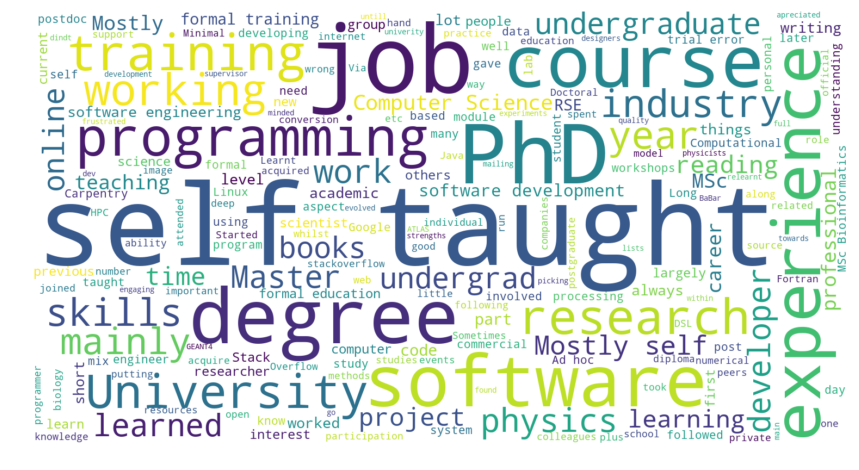

In [206]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.

In [207]:
data = pd.Series(df[['skill2[SQ001]. What skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical. [Skill 1]', 'skill2[SQ2]. What skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical. [Skill 2]', 'skill2[SQ3]. What skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical. [Skill 3]']].values.ravel('F')).dropna()
data = [z.strip() for i in data for z in i.split(',') if len(z.strip()) > 2]
data = [z.replace('/', ' ').replace(';', ' ').strip().lower() for z in data]
data = [ ''.join(i for i in s if not i.isdigit()).strip() for s in data if len(s) < 50 and s not in ['none']]
print('There are {} propositions'.format(len(data)))

There are 298 propositions


In [208]:
results = dict()
for i in data:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3 and k[1] > 1:
        print(k[0].title(), k[1])

Project Management 16
Machine Learning 5
People Management 4
Statistics 4
Testing 4
Management 3
Python 3
Software Design 3
Hadoop 2
Time Management 2
Gpu Programming 2
Javascript 2
Time Project Management 2
Version Control 2
Cuda 2
Web Development 2
Java 2
Django 2
Unit Testing 2
Agile Development 2
Functional Programming 2


(-0.5, 1499.5, 799.5, -0.5)

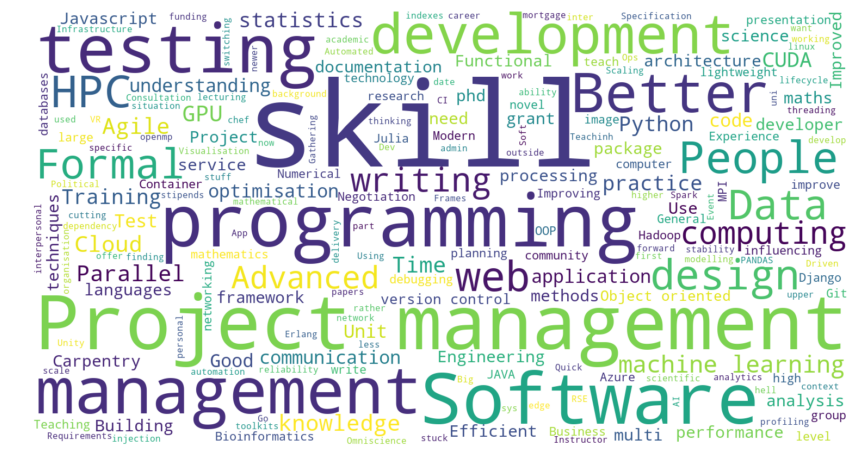

In [209]:
wc = wordcloud(df, ['skill2[SQ001]. What skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical. [Skill 1]', 'skill2[SQ2]. What skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical. [Skill 2]', 'skill2[SQ3]. What skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical. [Skill 3]'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## RSE Network

### How do you meet other RSEs?

In [210]:
v_to_count, filename  = get_count(df, ['ukrse2[SQ001]. How do you meet other RSEs? [UK RSE Association]', 'ukrse2[SQ002]. How do you meet other RSEs? [Local RSE group/network]', 'ukrse2[SQ003]. How do you meet other RSEs? [N/A]'], "multiple choices", "./../../survey_creation/2017/uk/listAnswers/ukrse.csv", "False", "./uk/output/")

In [211]:
perc_to_count = get_percentage(v_to_count, filename)

In [212]:
display_side_by_side(v_to_count,perc_to_count)

Count Percentage
How do you meet other RSEs?                  
N/A                            101         42
UK RSE Association              72         30
Local RSE group/network         66         28

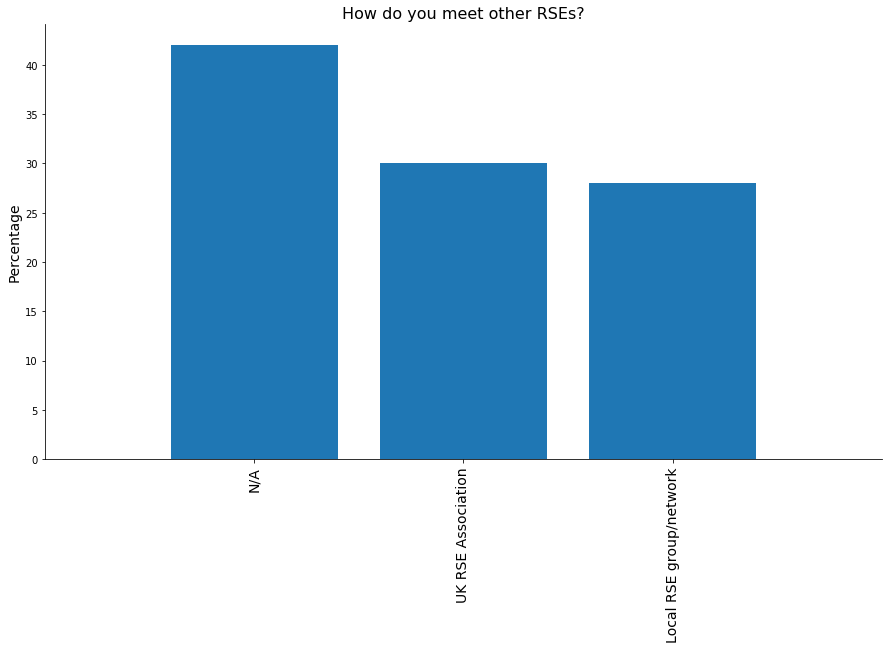

In [213]:
_ = get_plot(perc_to_count, "multiple choices")

### Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list)

In [214]:
v_to_count, filename  = get_count(df, ['ukrse1. Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list at www.rse.ac.uk)'], "y/n/na", "./../../survey_creation/2017/uk/listAnswers/.csv", "False", "./uk/output/")

In [215]:
perc_to_count = get_percentage(v_to_count, filename)

In [216]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Are you a member of the UK RSE Association? (Me...                            
 Are you a member of the UK RSE Association? (M...          156          62   

                                                    NaN value  \
Are you a member of the UK RSE Association? (Me...              
 Are you a member of the UK RSE Association? (M...         35   

                                                   Yes [Percentage]  \
Are you a member of the UK RSE Association? (Me...                    
 Are you a member of the UK RSE Association? (M...               72   

                                                   No [Percentage]  
Are you a member of the UK RSE Association? (Me...                  
 Are you a member of the UK RSE Association? (M...              28

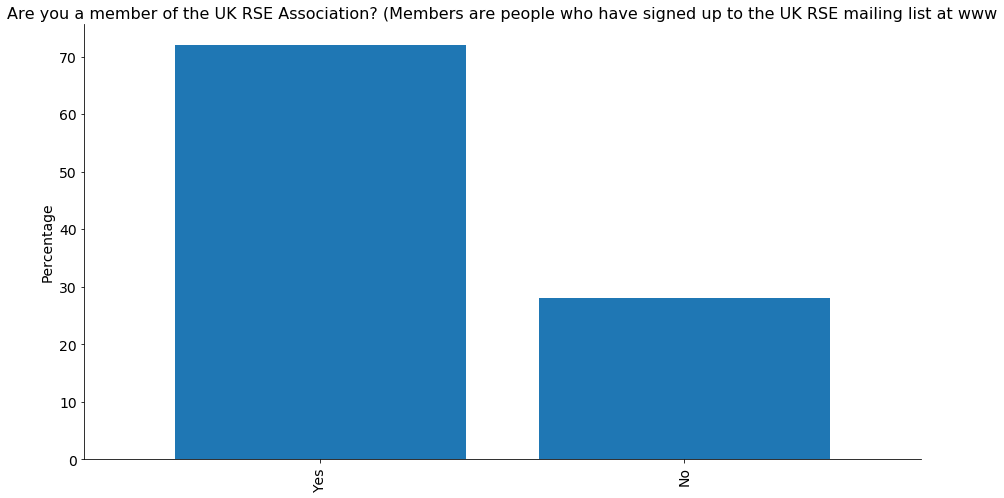

In [217]:
_ = get_plot(perc_to_count, "y/n/na")